In [1]:
import os
import pandas as pd


In [2]:
# make above reading csv as a function
# read all the files in the directory ../human_eval_data_collection

# get the file name list first

def read_csv_files_in_directory(directory_path):
    # you should only add the csv files names in the directory
    file_names = os.listdir(directory_path)
    csv_files = [file for file in file_names if file.endswith(".csv")]
    return csv_files

def read_csv_file(file_name):
    return pd.read_csv(file_name)

def get_scenario_id(file_name):
    return file_name.split("scenario_")[1].split("_2025")[0]



In [3]:


# only keep the stimulus and response columns
# you should then remove all the rows that response is NaN or 0
# write a function

def clean_human_eval_data(human_eval_data):
    human_eval_data = human_eval_data[['stimulus', 'response']]
    human_eval_data = human_eval_data.dropna(subset=['response', 'stimulus'])
    human_eval_data = human_eval_data[human_eval_data['response'] != "0"]
    # renamme the stimulus to scenarios
    human_eval_data = human_eval_data.rename(columns={"stimulus": "scenarios"})
    human_eval_data = human_eval_data.reset_index(drop=True)
    return human_eval_data

# you should do all above steps for all the files in the ../human_eval_data_collection

# get the file name list first

file_name_list = read_csv_files_in_directory("../human_eval_data_collection")

file_name_list

file_name_path = "../human_eval_data_collection/"

for file_name in file_name_list:
    human_eval_data = read_csv_file(f"{file_name_path}{file_name}")
    cleaned_human_eval_data = clean_human_eval_data(human_eval_data)
    scenario_id = get_scenario_id(file_name)
    match_csv = pd.read_csv(f"../eval_data_random_index/human_llm_eval_scenario_{scenario_id}.csv")
    concatenated_data = pd.concat([match_csv, cleaned_human_eval_data], axis=1)
    concatenated_data = concatenated_data.sort_values(by='index')
    concatenated_data = concatenated_data.iloc[5:]
    concatenated_data = concatenated_data.reset_index(drop=True)
    concatenated_data = concatenated_data.drop(columns=["index", "scenarios"])
    concatenated_data.to_csv(f"./processed_eval_data_step1/human_llm_eval_scenario_{scenario_id}_concat.csv", index=False)
    print(f"Done for {file_name}")

    


Done for participant_678d9395277ecfbf44f51cc3_human_llm_eval_scenario_34_2025_01_20T01_05_20_405Z.csv
Done for participant_677f63a186dea423fa1e18ad_human_llm_eval_scenario_88_2025_01_20T04_27_53_045Z.csv
Done for participant_5fea344e705a1f5323ade8c7_human_llm_eval_scenario_108_2025_01_20T04_30_58_448Z.csv
Done for participant_655fd5be8c6f7bfe39e75e96_human_llm_eval_scenario_49_2025_01_20T04_30_18_668Z.csv
Done for participant_676fcab71af57d43a5e5a1a9_human_llm_eval_scenario_65_2025_01_20T04_24_13_985Z.csv
Done for participant_678b7f803189bf30c21202be_human_llm_eval_scenario_112_2025_01_20T04_35_01_737Z.csv
Done for participant_60fcda3133c61e860a94fc9a_human_llm_eval_scenario_150_2025_01_20T05_15_22_305Z.csv
Done for participant_5f8eefc5d0e7960af7411183_human_llm_eval_scenario_15_2025_01_19T21_54_14_055Z.csv
Done for participant_673006fde0527a61075e0d2c_human_llm_eval_scenario_43_2025_01_20T04_31_13_568Z.csv
Done for participant_665887366ffbd0dff9885595_human_llm_eval_scenario_56_2025_0

In [6]:


# for all the files in the ./processed_eval_data_step1
# you should extract the scenario_id between the text "scenario_" and "_concat"
# and convert the scenario_id to an integer
# and you should do the even and odd split for all the files

# get the file name list first

file_name_list = read_csv_files_in_directory("./processed_eval_data_step1")

# file_name_list = file_name_list[7:9]

file_name_path = "./processed_eval_data_step1/"

# if scenario_id is even, then generate the even list
# if scenario_id is odd, then generate the odd list

even_scenario_id_list = [int(file_name.split("scenario_")[1].split("_concat")[0]) for file_name in file_name_list if int(file_name.split("scenario_")[1].split("_concat")[0]) % 2 == 0]

odd_scenario_id_list = [int(file_name.split("scenario_")[1].split("_concat")[0]) for file_name in file_name_list if int(file_name.split("scenario_")[1].split("_concat")[0]) % 2 != 0]

# you should do all above steps for all the files in the ./processed_eval_data_step1

# make a dict to store human_vs_llm_responses_even_dict
human_vs_llm_responses_even_store_dict = {}

# make a dict to store human_vs_llm_responses_odd_dict
human_vs_llm_responses_odd_store_dict = {}

# make a dict to store aligned_rating_misaligned_goal_human_response_comparison_even_dict

aligned_rating_misaligned_goal_human_response_comparison_even_store_dict = {}

# make a dict to store aligned_rating_misaligned_goal_human_response_comparison_odd_dict

aligned_rating_misaligned_goal_human_response_comparison_odd_store_dict = {}

# make a dict to store aligned_goal_misaligned_rating_human_response_comparison_even_dict

aligned_goal_misaligned_rating_human_response_comparison_even_store_dict = {}

# make a dict to store aligned_goal_misaligned_rating_human_response_comparison_odd_dict

aligned_goal_misaligned_rating_human_response_comparison_odd_store_dict = {}

# make a dict to store aligned_rating_misaligned_goal_llm_response_comparison_even_dict

aligned_rating_misaligned_goal_llm_response_comparison_even_store_dict = {}

# make a dict to store aligned_rating_misaligned_goal_llm_response_comparison_odd_dict

aligned_rating_misaligned_goal_llm_response_comparison_odd_store_dict = {}

# make a dict to store aligned_goal_misaligned_rating_llm_response_comparison_even_dict

aligned_goal_misaligned_rating_llm_response_comparison_even_store_dict = {}

# make a dict to store aligned_goal_misaligned_rating_llm_response_comparison_odd_dict

aligned_goal_misaligned_rating_llm_response_comparison_odd_store_dict = {}

for file_name in file_name_list:
    # get the scenario_id
    scenario_id = int(file_name.split("scenario_")[1].split("_concat")[0])
    # read the file
    concatenated_data = pd.read_csv(f"{file_name_path}{file_name}")

    # if scenario_id in even_scenario_id_list, then do all the even stuff

    if scenario_id in even_scenario_id_list:
        human_vs_llm_responses_even = concatenated_data.iloc[[0, 5, 10, 15]]
        aligned_rating_misaligned_goal_human_response_comparison_even = concatenated_data.iloc[[1, 6, 11, 16]]
        aligned_goal_misaligned_rating_human_response_comparison_even = concatenated_data.iloc[[2, 7, 12, 17]]
        aligned_rating_misaligned_goal_llm_response_comparison_even = concatenated_data.iloc[[3, 8, 13, 18]]
        aligned_goal_misaligned_rating_llm_response_comparison_even = concatenated_data.iloc[[4, 9, 14, 19]]
        human_vs_llm_responses_even_response_frequency = human_vs_llm_responses_even['response'].value_counts()
        aligned_rating_misaligned_goal_human_response_comparison_even_response_frequency = aligned_rating_misaligned_goal_human_response_comparison_even['response'].value_counts()
        aligned_goal_misaligned_rating_human_response_comparison_even_response_frequency = aligned_goal_misaligned_rating_human_response_comparison_even['response'].value_counts()
        aligned_rating_misaligned_goal_llm_response_comparison_even_response_frequency = aligned_rating_misaligned_goal_llm_response_comparison_even['response'].value_counts()
        aligned_goal_misaligned_rating_llm_response_comparison_even_response_frequency = aligned_goal_misaligned_rating_llm_response_comparison_even['response'].value_counts()
        human_vs_llm_responses_even_response_frequency_dict = human_vs_llm_responses_even_response_frequency.to_dict()
        aligned_rating_misaligned_goal_human_response_comparison_even_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_even_response_frequency.to_dict()
        aligned_goal_misaligned_rating_human_response_comparison_even_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_even_response_frequency.to_dict()
        aligned_rating_misaligned_goal_llm_response_comparison_even_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_even_response_frequency.to_dict()
        aligned_goal_misaligned_rating_llm_response_comparison_even_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_even_response_frequency.to_dict()

        # store the data in the dict
        human_vs_llm_responses_even_store_dict[scenario_id] = human_vs_llm_responses_even_response_frequency_dict
        aligned_rating_misaligned_goal_human_response_comparison_even_store_dict[scenario_id] = aligned_rating_misaligned_goal_human_response_comparison_even_response_frequency_dict
        aligned_goal_misaligned_rating_human_response_comparison_even_store_dict[scenario_id] = aligned_goal_misaligned_rating_human_response_comparison_even_response_frequency_dict
        aligned_rating_misaligned_goal_llm_response_comparison_even_store_dict[scenario_id] = aligned_rating_misaligned_goal_llm_response_comparison_even_response_frequency_dict
        aligned_goal_misaligned_rating_llm_response_comparison_even_store_dict[scenario_id] = aligned_goal_misaligned_rating_llm_response_comparison_even_response_frequency_dict

    # if scenario_id in odd_scenario_id_list, then do all the odd stuff
        
    if scenario_id in odd_scenario_id_list:
        human_vs_llm_responses_odd = concatenated_data.iloc[[0, 5, 10, 15]]
        aligned_rating_misaligned_goal_human_response_comparison_odd = concatenated_data.iloc[[1, 6, 11, 16]]
        aligned_goal_misaligned_rating_human_response_comparison_odd = concatenated_data.iloc[[2, 7, 12, 17]]
        aligned_rating_misaligned_goal_llm_response_comparison_odd = concatenated_data.iloc[[3, 8, 13, 18]]
        aligned_goal_misaligned_rating_llm_response_comparison_odd = concatenated_data.iloc[[4, 9, 14, 19]]
        human_vs_llm_responses_odd_response_frequency = human_vs_llm_responses_odd['response'].value_counts()
        aligned_rating_misaligned_goal_human_response_comparison_odd_response_frequency = aligned_rating_misaligned_goal_human_response_comparison_odd['response'].value_counts()
        aligned_goal_misaligned_rating_human_response_comparison_odd_response_frequency = aligned_goal_misaligned_rating_human_response_comparison_odd['response'].value_counts()
        aligned_rating_misaligned_goal_llm_response_comparison_odd_response_frequency = aligned_rating_misaligned_goal_llm_response_comparison_odd['response'].value_counts()
        aligned_goal_misaligned_rating_llm_response_comparison_odd_response_frequency = aligned_goal_misaligned_rating_llm_response_comparison_odd['response'].value_counts()
        human_vs_llm_responses_odd_response_frequency_dict = human_vs_llm_responses_odd_response_frequency.to_dict()
        aligned_rating_misaligned_goal_human_response_comparison_odd_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_odd_response_frequency.to_dict()
        aligned_goal_misaligned_rating_human_response_comparison_odd_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_odd_response_frequency.to_dict()
        aligned_rating_misaligned_goal_llm_response_comparison_odd_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_odd_response_frequency.to_dict()
        aligned_goal_misaligned_rating_llm_response_comparison_odd_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_odd_response_frequency.to_dict()

        # store the data in the dict
        human_vs_llm_responses_odd_store_dict[scenario_id] = human_vs_llm_responses_odd_response_frequency_dict
        aligned_rating_misaligned_goal_human_response_comparison_odd_store_dict[scenario_id] = aligned_rating_misaligned_goal_human_response_comparison_odd_response_frequency_dict
        aligned_goal_misaligned_rating_human_response_comparison_odd_store_dict[scenario_id] = aligned_goal_misaligned_rating_human_response_comparison_odd_response_frequency_dict
        aligned_rating_misaligned_goal_llm_response_comparison_odd_store_dict[scenario_id] = aligned_rating_misaligned_goal_llm_response_comparison_odd_response_frequency_dict
        aligned_goal_misaligned_rating_llm_response_comparison_odd_store_dict[scenario_id] = aligned_goal_misaligned_rating_llm_response_comparison_odd_response_frequency_dict

    

        

In [7]:
# count the number of A and B in the above dict
#{2: {'B': 2, 'A': 2}, 8: {'A': 4},0: {'A': 4},6: {'A': 3, 'B': 1},4: {'A': 2, 'B': 2}}
# and save as a dict with keys are A and B, value is frequency

def count_A_B_frequency(data_dict):
    A_count = 0
    B_count = 0
    for key, value in data_dict.items():
        if "A" in value:
            A_count += value["A"]
        if "B" in value:
            B_count += value["B"]
    return {"A": A_count, "B": B_count}


In [8]:
# BABAA, ABABB

count_A_B_frequency(human_vs_llm_responses_even_store_dict), count_A_B_frequency(human_vs_llm_responses_odd_store_dict)

human_preferences_even = count_A_B_frequency(human_vs_llm_responses_even_store_dict)['B']
human_preferences_add = count_A_B_frequency(human_vs_llm_responses_odd_store_dict)['A']

llm_preferences_even = count_A_B_frequency(human_vs_llm_responses_even_store_dict)['A']
llm_preferences_add = count_A_B_frequency(human_vs_llm_responses_odd_store_dict)['B']

human_preferences = count_A_B_frequency(human_vs_llm_responses_even_store_dict)['B'] + count_A_B_frequency(human_vs_llm_responses_odd_store_dict)['A']
llm_preferences = count_A_B_frequency(human_vs_llm_responses_even_store_dict)['A'] + count_A_B_frequency(human_vs_llm_responses_odd_store_dict)['B']

human_preferences, llm_preferences

(215, 409)

In [9]:
count_A_B_frequency(aligned_rating_misaligned_goal_human_response_comparison_even_store_dict), count_A_B_frequency(aligned_rating_misaligned_goal_human_response_comparison_odd_store_dict)

expected_aligned_rating_misaligned_goal_human_response_comparison = count_A_B_frequency(aligned_rating_misaligned_goal_human_response_comparison_even_store_dict)['A'] + count_A_B_frequency(aligned_rating_misaligned_goal_human_response_comparison_odd_store_dict)['B']

unexpected_aligned_rating_misaligned_goal_human_response_comparison = count_A_B_frequency(aligned_rating_misaligned_goal_human_response_comparison_even_store_dict)['B'] + count_A_B_frequency(aligned_rating_misaligned_goal_human_response_comparison_odd_store_dict)['A']

expected_aligned_rating_misaligned_goal_human_response_comparison, unexpected_aligned_rating_misaligned_goal_human_response_comparison


(411, 213)

In [10]:
count_A_B_frequency(aligned_goal_misaligned_rating_human_response_comparison_even_store_dict), count_A_B_frequency(aligned_goal_misaligned_rating_human_response_comparison_odd_store_dict)

expected_aligned_goal_misaligned_rating_human_response_comparison = count_A_B_frequency(aligned_goal_misaligned_rating_human_response_comparison_even_store_dict)['B'] + count_A_B_frequency(aligned_goal_misaligned_rating_human_response_comparison_odd_store_dict)['A']

unexpected_aligned_goal_misaligned_rating_human_response_comparison = count_A_B_frequency(aligned_goal_misaligned_rating_human_response_comparison_even_store_dict)['A'] + count_A_B_frequency(aligned_goal_misaligned_rating_human_response_comparison_odd_store_dict)['B']

expected_aligned_goal_misaligned_rating_human_response_comparison, unexpected_aligned_goal_misaligned_rating_human_response_comparison

(442, 182)

In [11]:
# llm dict
count_A_B_frequency(aligned_rating_misaligned_goal_llm_response_comparison_even_store_dict), count_A_B_frequency(aligned_rating_misaligned_goal_llm_response_comparison_odd_store_dict)

expected_aligned_rating_misaligned_goal_llm_response_comparison = count_A_B_frequency(aligned_rating_misaligned_goal_llm_response_comparison_even_store_dict)['A'] + count_A_B_frequency(aligned_rating_misaligned_goal_llm_response_comparison_odd_store_dict)['B']

unexpected_aligned_rating_misaligned_goal_llm_response_comparison = count_A_B_frequency(aligned_rating_misaligned_goal_llm_response_comparison_even_store_dict)['B'] + count_A_B_frequency(aligned_rating_misaligned_goal_llm_response_comparison_odd_store_dict)['A']

expected_aligned_rating_misaligned_goal_llm_response_comparison, unexpected_aligned_rating_misaligned_goal_llm_response_comparison

(468, 156)

In [12]:
count_A_B_frequency(aligned_goal_misaligned_rating_llm_response_comparison_even_store_dict), count_A_B_frequency(aligned_goal_misaligned_rating_llm_response_comparison_odd_store_dict)

expected_aligned_goal_misaligned_rating_llm_response_comparison = count_A_B_frequency(aligned_goal_misaligned_rating_llm_response_comparison_even_store_dict)['A'] + count_A_B_frequency(aligned_goal_misaligned_rating_llm_response_comparison_odd_store_dict)['B']

unexpected_aligned_goal_misaligned_rating_llm_response_comparison = count_A_B_frequency(aligned_goal_misaligned_rating_llm_response_comparison_even_store_dict)['B'] + count_A_B_frequency(aligned_goal_misaligned_rating_llm_response_comparison_odd_store_dict)['A']

expected_aligned_goal_misaligned_rating_llm_response_comparison, unexpected_aligned_goal_misaligned_rating_llm_response_comparison

(475, 149)

golden answers for even number human_vs_llm is: B

golden answers for even number aligned_rating_misaligned_goal_human_response_comparison is: A

golden answers for even number aligned_goal_misaligned_rating_human_response_comparison is: B

golden answers for even number aligned_rating_misaligned_goal_llm_response_comparison is: A

golden answers for even number aligned_goal_misaligned_rating_llm_response_comparison is: A

for odd numbers:

it's: A B A B B

0 out of 3 hearts

1 out of 3 hearts

2 out of 3 hearts

3 out of 3 hearts

If .*? wanted to BOTH make .*? feel good AND give accurate and informative feedback,

If .*? wanted to make .*? feel good, but not necessarily give informative feedback

If .*? wanted to give as accurate and informative feedback as possible, but not necessarily make .*? feel good.

In [18]:
# create an empty pd.DataFrame called human_vs_llm_responses_even_o_out_of_3_hearts
human_vs_llm_responses_even_0_out_of_3_hearts = pd.DataFrame()
human_vs_llm_responses_even_1_out_of_3_hearts = pd.DataFrame()
human_vs_llm_responses_even_2_out_of_3_hearts = pd.DataFrame()
human_vs_llm_responses_even_3_out_of_3_hearts = pd.DataFrame()

human_vs_llm_responses_odd_0_out_of_3_hearts = pd.DataFrame()
human_vs_llm_responses_odd_1_out_of_3_hearts = pd.DataFrame()
human_vs_llm_responses_odd_2_out_of_3_hearts = pd.DataFrame()
human_vs_llm_responses_odd_3_out_of_3_hearts = pd.DataFrame()

aligned_rating_misaligned_goal_human_response_comparison_even_0_out_of_3_hearts = pd.DataFrame()
aligned_rating_misaligned_goal_human_response_comparison_even_1_out_of_3_hearts = pd.DataFrame()
aligned_rating_misaligned_goal_human_response_comparison_even_2_out_of_3_hearts = pd.DataFrame()
aligned_rating_misaligned_goal_human_response_comparison_even_3_out_of_3_hearts = pd.DataFrame()

aligned_rating_misaligned_goal_human_response_comparison_odd_0_out_of_3_hearts = pd.DataFrame()
aligned_rating_misaligned_goal_human_response_comparison_odd_1_out_of_3_hearts = pd.DataFrame()
aligned_rating_misaligned_goal_human_response_comparison_odd_2_out_of_3_hearts = pd.DataFrame()
aligned_rating_misaligned_goal_human_response_comparison_odd_3_out_of_3_hearts = pd.DataFrame()

aligned_goal_misaligned_rating_human_response_comparison_even_0_out_of_3_hearts = pd.DataFrame()
aligned_goal_misaligned_rating_human_response_comparison_even_1_out_of_3_hearts = pd.DataFrame()
aligned_goal_misaligned_rating_human_response_comparison_even_2_out_of_3_hearts = pd.DataFrame()
aligned_goal_misaligned_rating_human_response_comparison_even_3_out_of_3_hearts = pd.DataFrame()

aligned_goal_misaligned_rating_human_response_comparison_odd_0_out_of_3_hearts = pd.DataFrame()
aligned_goal_misaligned_rating_human_response_comparison_odd_1_out_of_3_hearts = pd.DataFrame()
aligned_goal_misaligned_rating_human_response_comparison_odd_2_out_of_3_hearts = pd.DataFrame()
aligned_goal_misaligned_rating_human_response_comparison_odd_3_out_of_3_hearts = pd.DataFrame()

aligned_rating_misaligned_goal_llm_response_comparison_even_0_out_of_3_hearts = pd.DataFrame()
aligned_rating_misaligned_goal_llm_response_comparison_even_1_out_of_3_hearts = pd.DataFrame()
aligned_rating_misaligned_goal_llm_response_comparison_even_2_out_of_3_hearts = pd.DataFrame()
aligned_rating_misaligned_goal_llm_response_comparison_even_3_out_of_3_hearts = pd.DataFrame()

aligned_rating_misaligned_goal_llm_response_comparison_odd_0_out_of_3_hearts = pd.DataFrame()
aligned_rating_misaligned_goal_llm_response_comparison_odd_1_out_of_3_hearts = pd.DataFrame()
aligned_rating_misaligned_goal_llm_response_comparison_odd_2_out_of_3_hearts = pd.DataFrame()
aligned_rating_misaligned_goal_llm_response_comparison_odd_3_out_of_3_hearts = pd.DataFrame()

aligned_goal_misaligned_rating_llm_response_comparison_even_0_out_of_3_hearts = pd.DataFrame()
aligned_goal_misaligned_rating_llm_response_comparison_even_1_out_of_3_hearts = pd.DataFrame()
aligned_goal_misaligned_rating_llm_response_comparison_even_2_out_of_3_hearts = pd.DataFrame()
aligned_goal_misaligned_rating_llm_response_comparison_even_3_out_of_3_hearts = pd.DataFrame()

aligned_goal_misaligned_rating_llm_response_comparison_odd_0_out_of_3_hearts = pd.DataFrame()
aligned_goal_misaligned_rating_llm_response_comparison_odd_1_out_of_3_hearts = pd.DataFrame()
aligned_goal_misaligned_rating_llm_response_comparison_odd_2_out_of_3_hearts = pd.DataFrame()
aligned_goal_misaligned_rating_llm_response_comparison_odd_3_out_of_3_hearts = pd.DataFrame()

In [19]:
# 0 out of 3 hearts

# 1 out of 3 hearts

# 2 out of 3 hearts

# 3 out of 3 hearts

# If .*? wanted to BOTH make .*? feel good AND give accurate and informative feedback,

# If .*? wanted to give as accurate and informative feedback as possible, but not necessarily make .*? feel good.

# If .*? wanted to make .*? feel good, but not necessarily give informative feedback

file_name_list = read_csv_files_in_directory("./processed_eval_data_step1")

file_name_path = "./processed_eval_data_step1/"

even_scenario_id_list = [int(file_name.split("scenario_")[1].split("_concat")[0]) for file_name in file_name_list if int(file_name.split("scenario_")[1].split("_concat")[0]) % 2 == 0]

odd_scenario_id_list = [int(file_name.split("scenario_")[1].split("_concat")[0]) for file_name in file_name_list if int(file_name.split("scenario_")[1].split("_concat")[0]) % 2 != 0]

for file_name in file_name_list:
    scenario_id = int(file_name.split("scenario_")[1].split("_concat")[0])
    # read the file
    concatenated_data = pd.read_csv(f"{file_name_path}{file_name}")

    

    if scenario_id in even_scenario_id_list:
        human_vs_llm_responses_even = concatenated_data.iloc[[0, 5, 10, 15]]
        aligned_rating_misaligned_goal_human_response_comparison_even = concatenated_data.iloc[[1, 6, 11, 16]]
        aligned_goal_misaligned_rating_human_response_comparison_even = concatenated_data.iloc[[2, 7, 12, 17]]
        aligned_rating_misaligned_goal_llm_response_comparison_even = concatenated_data.iloc[[3, 8, 13, 18]]
        aligned_goal_misaligned_rating_llm_response_comparison_even = concatenated_data.iloc[[4, 9, 14, 19]]

        # check the stimulus column of human_vs_llm_responses_even, aligned_rating_misaligned_goal_human_response_comparison_even, aligned_goal_misaligned_rating_human_response_comparison_even, aligned_rating_misaligned_goal_llm_response_comparison_even, aligned_goal_misaligned_rating_llm_response_comparison_even
        # if there is "0 out of 3 hearts" in the stimulus column of human_vs_llm_responses_even, then you should concat that row to the human_vs_llm_responses_even_0_out_of_3_hearts dataframe

        human_vs_llm_responses_even_0_out_of_3_hearts = pd.concat([human_vs_llm_responses_even_0_out_of_3_hearts, human_vs_llm_responses_even[human_vs_llm_responses_even['stimulus'].str.contains("0 out of 3 hearts")]])
        human_vs_llm_responses_even_1_out_of_3_hearts = pd.concat([human_vs_llm_responses_even_1_out_of_3_hearts, human_vs_llm_responses_even[human_vs_llm_responses_even['stimulus'].str.contains("1 out of 3 hearts")]])
        human_vs_llm_responses_even_2_out_of_3_hearts = pd.concat([human_vs_llm_responses_even_2_out_of_3_hearts, human_vs_llm_responses_even[human_vs_llm_responses_even['stimulus'].str.contains("2 out of 3 hearts")]])
        human_vs_llm_responses_even_3_out_of_3_hearts = pd.concat([human_vs_llm_responses_even_3_out_of_3_hearts, human_vs_llm_responses_even[human_vs_llm_responses_even['stimulus'].str.contains("3 out of 3 hearts")]])

        aligned_rating_misaligned_goal_human_response_comparison_even_0_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_even_0_out_of_3_hearts, aligned_rating_misaligned_goal_human_response_comparison_even[aligned_rating_misaligned_goal_human_response_comparison_even['stimulus'].str.contains("0 out of 3 hearts")]])
        aligned_rating_misaligned_goal_human_response_comparison_even_1_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_even_1_out_of_3_hearts, aligned_rating_misaligned_goal_human_response_comparison_even[aligned_rating_misaligned_goal_human_response_comparison_even['stimulus'].str.contains("1 out of 3 hearts")]])
        aligned_rating_misaligned_goal_human_response_comparison_even_2_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_even_2_out_of_3_hearts, aligned_rating_misaligned_goal_human_response_comparison_even[aligned_rating_misaligned_goal_human_response_comparison_even['stimulus'].str.contains("2 out of 3 hearts")]])
        aligned_rating_misaligned_goal_human_response_comparison_even_3_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_even_3_out_of_3_hearts, aligned_rating_misaligned_goal_human_response_comparison_even[aligned_rating_misaligned_goal_human_response_comparison_even['stimulus'].str.contains("3 out of 3 hearts")]])

        aligned_goal_misaligned_rating_human_response_comparison_even_0_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_even_0_out_of_3_hearts, aligned_goal_misaligned_rating_human_response_comparison_even[aligned_goal_misaligned_rating_human_response_comparison_even['stimulus'].str.contains("0 out of 3 hearts")]])
        aligned_goal_misaligned_rating_human_response_comparison_even_1_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_even_1_out_of_3_hearts, aligned_goal_misaligned_rating_human_response_comparison_even[aligned_goal_misaligned_rating_human_response_comparison_even['stimulus'].str.contains("1 out of 3 hearts")]])
        aligned_goal_misaligned_rating_human_response_comparison_even_2_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_even_2_out_of_3_hearts, aligned_goal_misaligned_rating_human_response_comparison_even[aligned_goal_misaligned_rating_human_response_comparison_even['stimulus'].str.contains("2 out of 3 hearts")]])
        aligned_goal_misaligned_rating_human_response_comparison_even_3_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_even_3_out_of_3_hearts, aligned_goal_misaligned_rating_human_response_comparison_even[aligned_goal_misaligned_rating_human_response_comparison_even['stimulus'].str.contains("3 out of 3 hearts")]])

        aligned_rating_misaligned_goal_llm_response_comparison_even_0_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_even_0_out_of_3_hearts, aligned_rating_misaligned_goal_llm_response_comparison_even[aligned_rating_misaligned_goal_llm_response_comparison_even['stimulus'].str.contains("0 out of 3 hearts")]])
        aligned_rating_misaligned_goal_llm_response_comparison_even_1_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_even_1_out_of_3_hearts, aligned_rating_misaligned_goal_llm_response_comparison_even[aligned_rating_misaligned_goal_llm_response_comparison_even['stimulus'].str.contains("1 out of 3 hearts")]])
        aligned_rating_misaligned_goal_llm_response_comparison_even_2_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_even_2_out_of_3_hearts, aligned_rating_misaligned_goal_llm_response_comparison_even[aligned_rating_misaligned_goal_llm_response_comparison_even['stimulus'].str.contains("2 out of 3 hearts")]])
        aligned_rating_misaligned_goal_llm_response_comparison_even_3_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_even_3_out_of_3_hearts, aligned_rating_misaligned_goal_llm_response_comparison_even[aligned_rating_misaligned_goal_llm_response_comparison_even['stimulus'].str.contains("3 out of 3 hearts")]])

        aligned_goal_misaligned_rating_llm_response_comparison_even_0_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_even_0_out_of_3_hearts, aligned_goal_misaligned_rating_llm_response_comparison_even[aligned_goal_misaligned_rating_llm_response_comparison_even['stimulus'].str.contains("0 out of 3 hearts")]])
        aligned_goal_misaligned_rating_llm_response_comparison_even_1_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_even_1_out_of_3_hearts, aligned_goal_misaligned_rating_llm_response_comparison_even[aligned_goal_misaligned_rating_llm_response_comparison_even['stimulus'].str.contains("1 out of 3 hearts")]])
        aligned_goal_misaligned_rating_llm_response_comparison_even_2_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_even_2_out_of_3_hearts, aligned_goal_misaligned_rating_llm_response_comparison_even[aligned_goal_misaligned_rating_llm_response_comparison_even['stimulus'].str.contains("2 out of 3 hearts")]])
        aligned_goal_misaligned_rating_llm_response_comparison_even_3_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_even_3_out_of_3_hearts, aligned_goal_misaligned_rating_llm_response_comparison_even[aligned_goal_misaligned_rating_llm_response_comparison_even['stimulus'].str.contains("3 out of 3 hearts")]])


    if scenario_id in odd_scenario_id_list:
        human_vs_llm_responses_odd = concatenated_data.iloc[[0, 5, 10, 15]]
        aligned_rating_misaligned_goal_human_response_comparison_odd = concatenated_data.iloc[[1, 6, 11, 16]]
        aligned_goal_misaligned_rating_human_response_comparison_odd = concatenated_data.iloc[[2, 7, 12, 17]]
        aligned_rating_misaligned_goal_llm_response_comparison_odd = concatenated_data.iloc[[3, 8, 13, 18]]
        aligned_goal_misaligned_rating_llm_response_comparison_odd = concatenated_data.iloc[[4, 9, 14, 19]]

        # check the stimulus column of human_vs_llm_responses_odd, aligned_rating_misaligned_goal_human_response_comparison_odd, aligned_goal_misaligned_rating_human_response_comparison_odd, aligned_rating_misaligned_goal_llm_response_comparison_odd, aligned_goal_misaligned_rating_llm_response_comparison_odd
        # if there is "0 out of 3 hearts" in the stimulus column of human_vs_llm_responses_odd, then you should concat that row to the human_vs_llm_responses_odd_0_out_of_3_hearts dataframe

        human_vs_llm_responses_odd_0_out_of_3_hearts = pd.concat([human_vs_llm_responses_odd_0_out_of_3_hearts, human_vs_llm_responses_odd[human_vs_llm_responses_odd['stimulus'].str.contains("0 out of 3 hearts")]])
        human_vs_llm_responses_odd_1_out_of_3_hearts = pd.concat([human_vs_llm_responses_odd_1_out_of_3_hearts, human_vs_llm_responses_odd[human_vs_llm_responses_odd['stimulus'].str.contains("1 out of 3 hearts")]])
        human_vs_llm_responses_odd_2_out_of_3_hearts = pd.concat([human_vs_llm_responses_odd_2_out_of_3_hearts, human_vs_llm_responses_odd[human_vs_llm_responses_odd['stimulus'].str.contains("2 out of 3 hearts")]])
        human_vs_llm_responses_odd_3_out_of_3_hearts = pd.concat([human_vs_llm_responses_odd_3_out_of_3_hearts, human_vs_llm_responses_odd[human_vs_llm_responses_odd['stimulus'].str.contains("3 out of 3 hearts")]])

        aligned_rating_misaligned_goal_human_response_comparison_odd_0_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_odd_0_out_of_3_hearts, aligned_rating_misaligned_goal_human_response_comparison_odd[aligned_rating_misaligned_goal_human_response_comparison_odd['stimulus'].str.contains("0 out of 3 hearts")]])
        aligned_rating_misaligned_goal_human_response_comparison_odd_1_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_odd_1_out_of_3_hearts, aligned_rating_misaligned_goal_human_response_comparison_odd[aligned_rating_misaligned_goal_human_response_comparison_odd['stimulus'].str.contains("1 out of 3 hearts")]])
        aligned_rating_misaligned_goal_human_response_comparison_odd_2_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_odd_2_out_of_3_hearts, aligned_rating_misaligned_goal_human_response_comparison_odd[aligned_rating_misaligned_goal_human_response_comparison_odd['stimulus'].str.contains("2 out of 3 hearts")]])
        aligned_rating_misaligned_goal_human_response_comparison_odd_3_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_odd_3_out_of_3_hearts, aligned_rating_misaligned_goal_human_response_comparison_odd[aligned_rating_misaligned_goal_human_response_comparison_odd['stimulus'].str.contains("3 out of 3 hearts")]])

        aligned_goal_misaligned_rating_human_response_comparison_odd_0_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_odd_0_out_of_3_hearts, aligned_goal_misaligned_rating_human_response_comparison_odd[aligned_goal_misaligned_rating_human_response_comparison_odd['stimulus'].str.contains("0 out of 3 hearts")]])
        aligned_goal_misaligned_rating_human_response_comparison_odd_1_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_odd_1_out_of_3_hearts, aligned_goal_misaligned_rating_human_response_comparison_odd[aligned_goal_misaligned_rating_human_response_comparison_odd['stimulus'].str.contains("1 out of 3 hearts")]])
        aligned_goal_misaligned_rating_human_response_comparison_odd_2_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_odd_2_out_of_3_hearts, aligned_goal_misaligned_rating_human_response_comparison_odd[aligned_goal_misaligned_rating_human_response_comparison_odd['stimulus'].str.contains("2 out of 3 hearts")]])
        aligned_goal_misaligned_rating_human_response_comparison_odd_3_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_odd_3_out_of_3_hearts, aligned_goal_misaligned_rating_human_response_comparison_odd[aligned_goal_misaligned_rating_human_response_comparison_odd['stimulus'].str.contains("3 out of 3 hearts")]])

        aligned_rating_misaligned_goal_llm_response_comparison_odd_0_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_odd_0_out_of_3_hearts, aligned_rating_misaligned_goal_llm_response_comparison_odd[aligned_rating_misaligned_goal_llm_response_comparison_odd['stimulus'].str.contains("0 out of 3 hearts")]])
        aligned_rating_misaligned_goal_llm_response_comparison_odd_1_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_odd_1_out_of_3_hearts, aligned_rating_misaligned_goal_llm_response_comparison_odd[aligned_rating_misaligned_goal_llm_response_comparison_odd['stimulus'].str.contains("1 out of 3 hearts")]])
        aligned_rating_misaligned_goal_llm_response_comparison_odd_2_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_odd_2_out_of_3_hearts, aligned_rating_misaligned_goal_llm_response_comparison_odd[aligned_rating_misaligned_goal_llm_response_comparison_odd['stimulus'].str.contains("2 out of 3 hearts")]])
        aligned_rating_misaligned_goal_llm_response_comparison_odd_3_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_odd_3_out_of_3_hearts, aligned_rating_misaligned_goal_llm_response_comparison_odd[aligned_rating_misaligned_goal_llm_response_comparison_odd['stimulus'].str.contains("3 out of 3 hearts")]])

        aligned_goal_misaligned_rating_llm_response_comparison_odd_0_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_odd_0_out_of_3_hearts, aligned_goal_misaligned_rating_llm_response_comparison_odd[aligned_goal_misaligned_rating_llm_response_comparison_odd['stimulus'].str.contains("0 out of 3 hearts")]])
        aligned_goal_misaligned_rating_llm_response_comparison_odd_1_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_odd_1_out_of_3_hearts, aligned_goal_misaligned_rating_llm_response_comparison_odd[aligned_goal_misaligned_rating_llm_response_comparison_odd['stimulus'].str.contains("1 out of 3 hearts")]])
        aligned_goal_misaligned_rating_llm_response_comparison_odd_2_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_odd_2_out_of_3_hearts, aligned_goal_misaligned_rating_llm_response_comparison_odd[aligned_goal_misaligned_rating_llm_response_comparison_odd['stimulus'].str.contains("2 out of 3 hearts")]])
        aligned_goal_misaligned_rating_llm_response_comparison_odd_3_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_odd_3_out_of_3_hearts, aligned_goal_misaligned_rating_llm_response_comparison_odd[aligned_goal_misaligned_rating_llm_response_comparison_odd['stimulus'].str.contains("3 out of 3 hearts")]])



In [20]:
# now you should count the number of A and B in the above dataframes

# and save as a dict with keys are A and B, value is frequency
# 0 out of 3 hearts
human_vs_llm_responses_even_0_out_of_3_hearts_response_frequency_dict = {}
human_vs_llm_responses_even_0_out_of_3_hearts_response_frequency_dict = human_vs_llm_responses_even_0_out_of_3_hearts['response'].value_counts().to_dict()

human_vs_llm_responses_odd_0_out_of_3_hearts_response_frequency_dict = {}
human_vs_llm_responses_odd_0_out_of_3_hearts_response_frequency_dict = human_vs_llm_responses_odd_0_out_of_3_hearts['response'].value_counts().to_dict()

human_preference_0_out_of_3_hearts_response = human_vs_llm_responses_even_0_out_of_3_hearts_response_frequency_dict['B'] + human_vs_llm_responses_odd_0_out_of_3_hearts_response_frequency_dict['A']
llm_preference_0_out_of_3_hearts_response = human_vs_llm_responses_even_0_out_of_3_hearts_response_frequency_dict['A'] + human_vs_llm_responses_odd_0_out_of_3_hearts_response_frequency_dict['B']

aligned_rating_misaligned_goal_human_response_comparison_even_0_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_even_0_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_even_0_out_of_3_hearts['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_human_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_odd_0_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_human_response_comparison_0_out_of_3_hearts = aligned_rating_misaligned_goal_human_response_comparison_even_0_out_of_3_hearts_response_frequency_dict['A'] + aligned_rating_misaligned_goal_human_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_human_response_comparison_0_out_of_3_hearts = aligned_rating_misaligned_goal_human_response_comparison_even_0_out_of_3_hearts_response_frequency_dict['B'] + aligned_rating_misaligned_goal_human_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict['A']

aligned_goal_misaligned_rating_human_response_comparison_even_0_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_even_0_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_even_0_out_of_3_hearts['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_human_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_odd_0_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_human_response_comparison_0_out_of_3_hearts = aligned_goal_misaligned_rating_human_response_comparison_even_0_out_of_3_hearts_response_frequency_dict['B'] + aligned_goal_misaligned_rating_human_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict['A']
unexpected_aligned_goal_misaligned_rating_human_response_comparison_0_out_of_3_hearts = aligned_goal_misaligned_rating_human_response_comparison_even_0_out_of_3_hearts_response_frequency_dict['A'] + aligned_goal_misaligned_rating_human_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict['B']

aligned_rating_misaligned_goal_llm_response_comparison_even_0_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_even_0_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_even_0_out_of_3_hearts['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_llm_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_odd_0_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_llm_response_comparison_0_out_of_3_hearts = aligned_rating_misaligned_goal_llm_response_comparison_even_0_out_of_3_hearts_response_frequency_dict['A'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_0_out_of_3_hearts = aligned_rating_misaligned_goal_llm_response_comparison_even_0_out_of_3_hearts_response_frequency_dict['B'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict['A']

aligned_goal_misaligned_rating_llm_response_comparison_even_0_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_even_0_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_even_0_out_of_3_hearts['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_llm_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_odd_0_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_llm_response_comparison_0_out_of_3_hearts = aligned_goal_misaligned_rating_llm_response_comparison_even_0_out_of_3_hearts_response_frequency_dict['A'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict['B']
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_0_out_of_3_hearts = aligned_goal_misaligned_rating_llm_response_comparison_even_0_out_of_3_hearts_response_frequency_dict['B'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict['A']

# 1 out of 3 hearts
human_vs_llm_responses_even_1_out_of_3_hearts_response_frequency_dict = {}
human_vs_llm_responses_even_1_out_of_3_hearts_response_frequency_dict = human_vs_llm_responses_even_1_out_of_3_hearts['response'].value_counts().to_dict()

human_vs_llm_responses_odd_1_out_of_3_hearts_response_frequency_dict = {}
human_vs_llm_responses_odd_1_out_of_3_hearts_response_frequency_dict = human_vs_llm_responses_odd_1_out_of_3_hearts['response'].value_counts().to_dict()

human_preference_1_out_of_3_hearts_response = human_vs_llm_responses_even_1_out_of_3_hearts_response_frequency_dict['B'] + human_vs_llm_responses_odd_1_out_of_3_hearts_response_frequency_dict['A']
llm_preference_1_out_of_3_hearts_response = human_vs_llm_responses_even_1_out_of_3_hearts_response_frequency_dict['A'] + human_vs_llm_responses_odd_1_out_of_3_hearts_response_frequency_dict['B']

aligned_rating_misaligned_goal_human_response_comparison_even_1_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_even_1_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_even_1_out_of_3_hearts['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_human_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_odd_1_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_human_response_comparison_1_out_of_3_hearts = aligned_rating_misaligned_goal_human_response_comparison_even_1_out_of_3_hearts_response_frequency_dict['A'] + aligned_rating_misaligned_goal_human_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_human_response_comparison_1_out_of_3_hearts = aligned_rating_misaligned_goal_human_response_comparison_even_1_out_of_3_hearts_response_frequency_dict['B'] + aligned_rating_misaligned_goal_human_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict['A']

aligned_goal_misaligned_rating_human_response_comparison_even_1_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_even_1_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_even_1_out_of_3_hearts['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_human_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_odd_1_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_human_response_comparison_1_out_of_3_hearts = aligned_goal_misaligned_rating_human_response_comparison_even_1_out_of_3_hearts_response_frequency_dict['B'] + aligned_goal_misaligned_rating_human_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict['A']
unexpected_aligned_goal_misaligned_rating_human_response_comparison_1_out_of_3_hearts = aligned_goal_misaligned_rating_human_response_comparison_even_1_out_of_3_hearts_response_frequency_dict['A'] + aligned_goal_misaligned_rating_human_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict['B']

aligned_rating_misaligned_goal_llm_response_comparison_even_1_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_even_1_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_even_1_out_of_3_hearts['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_llm_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_odd_1_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_llm_response_comparison_1_out_of_3_hearts = aligned_rating_misaligned_goal_llm_response_comparison_even_1_out_of_3_hearts_response_frequency_dict['A'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_1_out_of_3_hearts = aligned_rating_misaligned_goal_llm_response_comparison_even_1_out_of_3_hearts_response_frequency_dict['B'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict['A']

aligned_goal_misaligned_rating_llm_response_comparison_even_1_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_even_1_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_even_1_out_of_3_hearts['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_llm_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_odd_1_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_llm_response_comparison_1_out_of_3_hearts = aligned_goal_misaligned_rating_llm_response_comparison_even_1_out_of_3_hearts_response_frequency_dict['A'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict['B']
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_1_out_of_3_hearts = aligned_goal_misaligned_rating_llm_response_comparison_even_1_out_of_3_hearts_response_frequency_dict['B'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict['A']

# 2 out of 3 hearts
human_vs_llm_responses_even_2_out_of_3_hearts_response_frequency_dict = {}
human_vs_llm_responses_even_2_out_of_3_hearts_response_frequency_dict = human_vs_llm_responses_even_2_out_of_3_hearts['response'].value_counts().to_dict()

human_vs_llm_responses_odd_2_out_of_3_hearts_response_frequency_dict = {}
human_vs_llm_responses_odd_2_out_of_3_hearts_response_frequency_dict = human_vs_llm_responses_odd_2_out_of_3_hearts['response'].value_counts().to_dict()

human_preference_2_out_of_3_hearts_response = human_vs_llm_responses_even_2_out_of_3_hearts_response_frequency_dict['B'] + human_vs_llm_responses_odd_2_out_of_3_hearts_response_frequency_dict['A']
llm_preference_2_out_of_3_hearts_response = human_vs_llm_responses_even_2_out_of_3_hearts_response_frequency_dict['A'] + human_vs_llm_responses_odd_2_out_of_3_hearts_response_frequency_dict['B']

aligned_rating_misaligned_goal_human_response_comparison_even_2_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_even_2_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_even_2_out_of_3_hearts['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_human_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_odd_2_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_human_response_comparison_2_out_of_3_hearts = aligned_rating_misaligned_goal_human_response_comparison_even_2_out_of_3_hearts_response_frequency_dict['A'] + aligned_rating_misaligned_goal_human_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_human_response_comparison_2_out_of_3_hearts = aligned_rating_misaligned_goal_human_response_comparison_even_2_out_of_3_hearts_response_frequency_dict['B'] + aligned_rating_misaligned_goal_human_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict['A']

aligned_goal_misaligned_rating_human_response_comparison_even_2_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_even_2_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_even_2_out_of_3_hearts['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_human_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_odd_2_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_human_response_comparison_2_out_of_3_hearts = aligned_goal_misaligned_rating_human_response_comparison_even_2_out_of_3_hearts_response_frequency_dict['B'] + aligned_goal_misaligned_rating_human_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict['A']
unexpected_aligned_goal_misaligned_rating_human_response_comparison_2_out_of_3_hearts = aligned_goal_misaligned_rating_human_response_comparison_even_2_out_of_3_hearts_response_frequency_dict['A'] + aligned_goal_misaligned_rating_human_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict['B']

aligned_rating_misaligned_goal_llm_response_comparison_even_2_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_even_2_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_even_2_out_of_3_hearts['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_llm_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_odd_2_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_llm_response_comparison_2_out_of_3_hearts = aligned_rating_misaligned_goal_llm_response_comparison_even_2_out_of_3_hearts_response_frequency_dict['A'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_2_out_of_3_hearts = aligned_rating_misaligned_goal_llm_response_comparison_even_2_out_of_3_hearts_response_frequency_dict['B'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict['A']

aligned_goal_misaligned_rating_llm_response_comparison_even_2_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_even_2_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_even_2_out_of_3_hearts['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_llm_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_odd_2_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_llm_response_comparison_2_out_of_3_hearts = aligned_goal_misaligned_rating_llm_response_comparison_even_2_out_of_3_hearts_response_frequency_dict['A'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict['B']
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_2_out_of_3_hearts = aligned_goal_misaligned_rating_llm_response_comparison_even_2_out_of_3_hearts_response_frequency_dict['B'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict['A']

# 3 out of 3 hearts
human_vs_llm_responses_even_3_out_of_3_hearts_response_frequency_dict = {}
human_vs_llm_responses_even_3_out_of_3_hearts_response_frequency_dict = human_vs_llm_responses_even_3_out_of_3_hearts['response'].value_counts().to_dict()

human_vs_llm_responses_odd_3_out_of_3_hearts_response_frequency_dict = {}
human_vs_llm_responses_odd_3_out_of_3_hearts_response_frequency_dict = human_vs_llm_responses_odd_3_out_of_3_hearts['response'].value_counts().to_dict()

human_preference_3_out_of_3_hearts_response = human_vs_llm_responses_even_3_out_of_3_hearts_response_frequency_dict['B'] + human_vs_llm_responses_odd_3_out_of_3_hearts_response_frequency_dict['A']
llm_preference_3_out_of_3_hearts_response = human_vs_llm_responses_even_3_out_of_3_hearts_response_frequency_dict['A'] + human_vs_llm_responses_odd_3_out_of_3_hearts_response_frequency_dict['B']

aligned_rating_misaligned_goal_human_response_comparison_even_3_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_even_3_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_even_3_out_of_3_hearts['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_human_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_odd_3_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_human_response_comparison_3_out_of_3_hearts = aligned_rating_misaligned_goal_human_response_comparison_even_3_out_of_3_hearts_response_frequency_dict['A'] + aligned_rating_misaligned_goal_human_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_human_response_comparison_3_out_of_3_hearts = aligned_rating_misaligned_goal_human_response_comparison_even_3_out_of_3_hearts_response_frequency_dict['B'] + aligned_rating_misaligned_goal_human_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict['A']

aligned_goal_misaligned_rating_human_response_comparison_even_3_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_even_3_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_even_3_out_of_3_hearts['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_human_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_odd_3_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_human_response_comparison_3_out_of_3_hearts = aligned_goal_misaligned_rating_human_response_comparison_even_3_out_of_3_hearts_response_frequency_dict['B'] + aligned_goal_misaligned_rating_human_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict['A']
unexpected_aligned_goal_misaligned_rating_human_response_comparison_3_out_of_3_hearts = aligned_goal_misaligned_rating_human_response_comparison_even_3_out_of_3_hearts_response_frequency_dict['A'] + aligned_goal_misaligned_rating_human_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict['B']

aligned_rating_misaligned_goal_llm_response_comparison_even_3_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_even_3_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_even_3_out_of_3_hearts['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_llm_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_odd_3_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_llm_response_comparison_3_out_of_3_hearts = aligned_rating_misaligned_goal_llm_response_comparison_even_3_out_of_3_hearts_response_frequency_dict['A'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_3_out_of_3_hearts = aligned_rating_misaligned_goal_llm_response_comparison_even_3_out_of_3_hearts_response_frequency_dict['B'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict['A']

aligned_goal_misaligned_rating_llm_response_comparison_even_3_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_even_3_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_even_3_out_of_3_hearts['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_llm_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_odd_3_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_llm_response_comparison_3_out_of_3_hearts = aligned_goal_misaligned_rating_llm_response_comparison_even_3_out_of_3_hearts_response_frequency_dict['A'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict['B']
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_3_out_of_3_hearts = aligned_goal_misaligned_rating_llm_response_comparison_even_3_out_of_3_hearts_response_frequency_dict['B'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict['A']

In [21]:
human_preference_0_out_of_3_hearts_response_percentage = round(human_preference_0_out_of_3_hearts_response / (human_preference_0_out_of_3_hearts_response + llm_preference_0_out_of_3_hearts_response) * 100, 2)
llm_preference_0_out_of_3_hearts_response_percentage = round(llm_preference_0_out_of_3_hearts_response / (human_preference_0_out_of_3_hearts_response + llm_preference_0_out_of_3_hearts_response) * 100,  2)
human_preference_1_out_of_3_hearts_response_percentage = round(human_preference_1_out_of_3_hearts_response / (human_preference_1_out_of_3_hearts_response + llm_preference_1_out_of_3_hearts_response) * 100, 2)
llm_preference_1_out_of_3_hearts_response_percentage = round(llm_preference_1_out_of_3_hearts_response / (human_preference_1_out_of_3_hearts_response + llm_preference_1_out_of_3_hearts_response) * 100,  2)
human_preference_2_out_of_3_hearts_response_percentage = round(human_preference_2_out_of_3_hearts_response / (human_preference_2_out_of_3_hearts_response + llm_preference_2_out_of_3_hearts_response) * 100, 2)
llm_preference_2_out_of_3_hearts_response_percentage = round(llm_preference_2_out_of_3_hearts_response / (human_preference_2_out_of_3_hearts_response + llm_preference_2_out_of_3_hearts_response) * 100,  2)
human_preference_3_out_of_3_hearts_response_percentage = round(human_preference_3_out_of_3_hearts_response / (human_preference_3_out_of_3_hearts_response + llm_preference_3_out_of_3_hearts_response) * 100, 2)
llm_preference_3_out_of_3_hearts_response_percentage = round(llm_preference_3_out_of_3_hearts_response / (human_preference_3_out_of_3_hearts_response + llm_preference_3_out_of_3_hearts_response) * 100,  2)

# make two lists of human and llm preference
human_preference_with_respect_to_ratings_list = [human_preference_0_out_of_3_hearts_response_percentage, human_preference_1_out_of_3_hearts_response_percentage, human_preference_2_out_of_3_hearts_response_percentage, human_preference_3_out_of_3_hearts_response_percentage]
llm_preference_with_respect_to_ratings_list = [llm_preference_0_out_of_3_hearts_response_percentage, llm_preference_1_out_of_3_hearts_response_percentage, llm_preference_2_out_of_3_hearts_response_percentage, llm_preference_3_out_of_3_hearts_response_percentage]

expected_aligned_rating_misaligned_goal_human_response_comparison_0_out_of_3_hearts_percentage = round(expected_aligned_rating_misaligned_goal_human_response_comparison_0_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_human_response_comparison_0_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_human_response_comparison_0_out_of_3_hearts) * 100, 2)
unexpected_aligned_rating_misaligned_goal_human_response_comparison_0_out_of_3_hearts_percentage = round(unexpected_aligned_rating_misaligned_goal_human_response_comparison_0_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_human_response_comparison_0_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_human_response_comparison_0_out_of_3_hearts) * 100, 2)
expected_aligned_rating_misaligned_goal_human_response_comparison_1_out_of_3_hearts_percentage = round(expected_aligned_rating_misaligned_goal_human_response_comparison_1_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_human_response_comparison_1_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_human_response_comparison_1_out_of_3_hearts) * 100, 2)
unexpected_aligned_rating_misaligned_goal_human_response_comparison_1_out_of_3_hearts_percentage = round(unexpected_aligned_rating_misaligned_goal_human_response_comparison_1_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_human_response_comparison_1_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_human_response_comparison_1_out_of_3_hearts) * 100, 2)
expected_aligned_rating_misaligned_goal_human_response_comparison_2_out_of_3_hearts_percentage = round(expected_aligned_rating_misaligned_goal_human_response_comparison_2_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_human_response_comparison_2_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_human_response_comparison_2_out_of_3_hearts) * 100, 2)
unexpected_aligned_rating_misaligned_goal_human_response_comparison_2_out_of_3_hearts_percentage = round(unexpected_aligned_rating_misaligned_goal_human_response_comparison_2_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_human_response_comparison_2_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_human_response_comparison_2_out_of_3_hearts) * 100, 2)
expected_aligned_rating_misaligned_goal_human_response_comparison_3_out_of_3_hearts_percentage = round(expected_aligned_rating_misaligned_goal_human_response_comparison_3_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_human_response_comparison_3_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_human_response_comparison_3_out_of_3_hearts) * 100, 2)
unexpected_aligned_rating_misaligned_goal_human_response_comparison_3_out_of_3_hearts_percentage = round(unexpected_aligned_rating_misaligned_goal_human_response_comparison_3_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_human_response_comparison_3_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_human_response_comparison_3_out_of_3_hearts) * 100, 2)

expected_aligned_rating_misaligned_goal_human_response_comparison_with_respect_to_ratings_list = [expected_aligned_rating_misaligned_goal_human_response_comparison_0_out_of_3_hearts_percentage, expected_aligned_rating_misaligned_goal_human_response_comparison_1_out_of_3_hearts_percentage, expected_aligned_rating_misaligned_goal_human_response_comparison_2_out_of_3_hearts_percentage, expected_aligned_rating_misaligned_goal_human_response_comparison_3_out_of_3_hearts_percentage]
unexpected_aligned_rating_misaligned_goal_human_response_comparison_with_respect_to_ratings_list = [unexpected_aligned_rating_misaligned_goal_human_response_comparison_0_out_of_3_hearts_percentage, unexpected_aligned_rating_misaligned_goal_human_response_comparison_1_out_of_3_hearts_percentage, unexpected_aligned_rating_misaligned_goal_human_response_comparison_2_out_of_3_hearts_percentage, unexpected_aligned_rating_misaligned_goal_human_response_comparison_3_out_of_3_hearts_percentage]

expected_aligned_goal_misaligned_rating_human_response_comparison_0_out_of_3_hearts_percentage = round(expected_aligned_goal_misaligned_rating_human_response_comparison_0_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_human_response_comparison_0_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_human_response_comparison_0_out_of_3_hearts) * 100, 2)
unexpected_aligned_goal_misaligned_rating_human_response_comparison_0_out_of_3_hearts_percentage = round(unexpected_aligned_goal_misaligned_rating_human_response_comparison_0_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_human_response_comparison_0_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_human_response_comparison_0_out_of_3_hearts) * 100, 2)
expected_aligned_goal_misaligned_rating_human_response_comparison_1_out_of_3_hearts_percentage = round(expected_aligned_goal_misaligned_rating_human_response_comparison_1_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_human_response_comparison_1_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_human_response_comparison_1_out_of_3_hearts) * 100, 2)
unexpected_aligned_goal_misaligned_rating_human_response_comparison_1_out_of_3_hearts_percentage = round(unexpected_aligned_goal_misaligned_rating_human_response_comparison_1_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_human_response_comparison_1_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_human_response_comparison_1_out_of_3_hearts) * 100, 2)
expected_aligned_goal_misaligned_rating_human_response_comparison_2_out_of_3_hearts_percentage = round(expected_aligned_goal_misaligned_rating_human_response_comparison_2_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_human_response_comparison_2_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_human_response_comparison_2_out_of_3_hearts) * 100, 2)
unexpected_aligned_goal_misaligned_rating_human_response_comparison_2_out_of_3_hearts_percentage = round(unexpected_aligned_goal_misaligned_rating_human_response_comparison_2_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_human_response_comparison_2_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_human_response_comparison_2_out_of_3_hearts) * 100, 2)
expected_aligned_goal_misaligned_rating_human_response_comparison_3_out_of_3_hearts_percentage = round(expected_aligned_goal_misaligned_rating_human_response_comparison_3_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_human_response_comparison_3_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_human_response_comparison_3_out_of_3_hearts) * 100, 2)
unexpected_aligned_goal_misaligned_rating_human_response_comparison_3_out_of_3_hearts_percentage = round(unexpected_aligned_goal_misaligned_rating_human_response_comparison_3_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_human_response_comparison_3_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_human_response_comparison_3_out_of_3_hearts) * 100, 2)

expected_aligned_goal_misaligned_rating_human_response_comparison_with_respect_to_ratings_list = [expected_aligned_goal_misaligned_rating_human_response_comparison_0_out_of_3_hearts_percentage, expected_aligned_goal_misaligned_rating_human_response_comparison_1_out_of_3_hearts_percentage, expected_aligned_goal_misaligned_rating_human_response_comparison_2_out_of_3_hearts_percentage, expected_aligned_goal_misaligned_rating_human_response_comparison_3_out_of_3_hearts_percentage]
unexpected_aligned_goal_misaligned_rating_human_response_comparison_with_respect_to_ratings_list = [unexpected_aligned_goal_misaligned_rating_human_response_comparison_0_out_of_3_hearts_percentage, unexpected_aligned_goal_misaligned_rating_human_response_comparison_1_out_of_3_hearts_percentage, unexpected_aligned_goal_misaligned_rating_human_response_comparison_2_out_of_3_hearts_percentage, unexpected_aligned_goal_misaligned_rating_human_response_comparison_3_out_of_3_hearts_percentage]

expected_aligned_rating_misaligned_goal_llm_response_comparison_0_out_of_3_hearts_percentage = round(expected_aligned_rating_misaligned_goal_llm_response_comparison_0_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_llm_response_comparison_0_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_0_out_of_3_hearts) * 100, 2)
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_0_out_of_3_hearts_percentage = round(unexpected_aligned_rating_misaligned_goal_llm_response_comparison_0_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_llm_response_comparison_0_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_0_out_of_3_hearts) * 100, 2)
expected_aligned_rating_misaligned_goal_llm_response_comparison_1_out_of_3_hearts_percentage = round(expected_aligned_rating_misaligned_goal_llm_response_comparison_1_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_llm_response_comparison_1_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_1_out_of_3_hearts) * 100, 2)
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_1_out_of_3_hearts_percentage = round(unexpected_aligned_rating_misaligned_goal_llm_response_comparison_1_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_llm_response_comparison_1_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_1_out_of_3_hearts) * 100, 2)
expected_aligned_rating_misaligned_goal_llm_response_comparison_2_out_of_3_hearts_percentage = round(expected_aligned_rating_misaligned_goal_llm_response_comparison_2_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_llm_response_comparison_2_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_2_out_of_3_hearts) * 100, 2)
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_2_out_of_3_hearts_percentage = round(unexpected_aligned_rating_misaligned_goal_llm_response_comparison_2_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_llm_response_comparison_2_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_2_out_of_3_hearts) * 100, 2)
expected_aligned_rating_misaligned_goal_llm_response_comparison_3_out_of_3_hearts_percentage = round(expected_aligned_rating_misaligned_goal_llm_response_comparison_3_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_llm_response_comparison_3_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_3_out_of_3_hearts) * 100, 2)
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_3_out_of_3_hearts_percentage = round(unexpected_aligned_rating_misaligned_goal_llm_response_comparison_3_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_llm_response_comparison_3_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_3_out_of_3_hearts) * 100, 2)

expected_aligned_rating_misaligned_goal_llm_response_comparison_with_respect_to_ratings_list = [expected_aligned_rating_misaligned_goal_llm_response_comparison_0_out_of_3_hearts_percentage, expected_aligned_rating_misaligned_goal_llm_response_comparison_1_out_of_3_hearts_percentage, expected_aligned_rating_misaligned_goal_llm_response_comparison_2_out_of_3_hearts_percentage, expected_aligned_rating_misaligned_goal_llm_response_comparison_3_out_of_3_hearts_percentage]
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_with_respect_to_ratings_list = [unexpected_aligned_rating_misaligned_goal_llm_response_comparison_0_out_of_3_hearts_percentage, unexpected_aligned_rating_misaligned_goal_llm_response_comparison_1_out_of_3_hearts_percentage, unexpected_aligned_rating_misaligned_goal_llm_response_comparison_2_out_of_3_hearts_percentage, unexpected_aligned_rating_misaligned_goal_llm_response_comparison_3_out_of_3_hearts_percentage]

expected_aligned_goal_misaligned_rating_llm_response_comparison_0_out_of_3_hearts_percentage = round(expected_aligned_goal_misaligned_rating_llm_response_comparison_0_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_llm_response_comparison_0_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_0_out_of_3_hearts) * 100, 2)
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_0_out_of_3_hearts_percentage = round(unexpected_aligned_goal_misaligned_rating_llm_response_comparison_0_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_llm_response_comparison_0_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_0_out_of_3_hearts) * 100, 2)
expected_aligned_goal_misaligned_rating_llm_response_comparison_1_out_of_3_hearts_percentage = round(expected_aligned_goal_misaligned_rating_llm_response_comparison_1_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_llm_response_comparison_1_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_1_out_of_3_hearts) * 100, 2)
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_1_out_of_3_hearts_percentage = round(unexpected_aligned_goal_misaligned_rating_llm_response_comparison_1_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_llm_response_comparison_1_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_1_out_of_3_hearts) * 100, 2)
expected_aligned_goal_misaligned_rating_llm_response_comparison_2_out_of_3_hearts_percentage = round(expected_aligned_goal_misaligned_rating_llm_response_comparison_2_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_llm_response_comparison_2_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_2_out_of_3_hearts) * 100, 2)
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_2_out_of_3_hearts_percentage = round(unexpected_aligned_goal_misaligned_rating_llm_response_comparison_2_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_llm_response_comparison_2_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_2_out_of_3_hearts) * 100, 2)
expected_aligned_goal_misaligned_rating_llm_response_comparison_3_out_of_3_hearts_percentage = round(expected_aligned_goal_misaligned_rating_llm_response_comparison_3_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_llm_response_comparison_3_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_3_out_of_3_hearts) * 100, 2)
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_3_out_of_3_hearts_percentage = round(unexpected_aligned_goal_misaligned_rating_llm_response_comparison_3_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_llm_response_comparison_3_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_3_out_of_3_hearts) * 100, 2)

expected_aligned_goal_misaligned_rating_llm_response_comparison_with_respect_to_ratings_list = [expected_aligned_goal_misaligned_rating_llm_response_comparison_0_out_of_3_hearts_percentage, expected_aligned_goal_misaligned_rating_llm_response_comparison_1_out_of_3_hearts_percentage, expected_aligned_goal_misaligned_rating_llm_response_comparison_2_out_of_3_hearts_percentage, expected_aligned_goal_misaligned_rating_llm_response_comparison_3_out_of_3_hearts_percentage]
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_with_respect_to_ratings_list = [unexpected_aligned_goal_misaligned_rating_llm_response_comparison_0_out_of_3_hearts_percentage, unexpected_aligned_goal_misaligned_rating_llm_response_comparison_1_out_of_3_hearts_percentage, unexpected_aligned_goal_misaligned_rating_llm_response_comparison_2_out_of_3_hearts_percentage, unexpected_aligned_goal_misaligned_rating_llm_response_comparison_3_out_of_3_hearts_percentage]

In [22]:
human_vs_llm_responses_even_0_out_of_3_hearts_response_frequency_dict

{'A': 48, 'B': 30}

In [23]:
aligned_rating_misaligned_goal_human_response_comparison_even_0_out_of_3_hearts

,stimulus,response
11,"Scenario:\nImagine that Sarah filmed a movie, ...",A
11,Scenario:\nImagine that Emma performed at a pi...,A
11,"Scenario:\nImagine that James baked a cake, bu...",A
11,"Scenario:\nImagine that Kevin drew a painting,...",B
11,Scenario:\nImagine that Patrick wrote a review...,A
...,...,...
11,"Scenario:\nImagine that Chris composed a song,...",B
11,"Scenario:\nImagine that Chris composed a song,...",A
11,Scenario:\nImagine that Grace gave a tap dance...,A
11,Scenario:\nImagine that Emma performed at a pi...,A


In [24]:
aligned_rating_misaligned_goal_human_response_comparison_odd_0_out_of_3_hearts

,stimulus,response
11,Scenario:\nImagine that Diana gave a monologue...,A
11,"Scenario:\nImagine that Chris composed a song,...",A
11,Scenario:\nImagine that Tom played a cello sol...,A
11,Scenario:\nImagine that Henry designed a mobil...,B
11,"Scenario:\nImagine that Jenny wrote a poem, bu...",A
...,...,...
11,"Scenario:\nImagine that Jenny wrote a poem, bu...",B
11,Scenario:\nImagine that Henry designed a mobil...,A
11,Scenario:\nImagine that Grace gave a tap dance...,A
11,"Scenario:\nImagine that James baked a cake, bu...",B


In [25]:
# create an empty pd.DataFrame called human_vs_llm_responses_even_both_goal
human_vs_llm_responses_even_both_goal = pd.DataFrame()

# create an empty pd.DataFrame called human_vs_llm_responses_even_social_goal
human_vs_llm_responses_even_social_goal = pd.DataFrame()

# create an empty pd.DataFrame called human_vs_llm_responses_even_informative_goal
human_vs_llm_responses_even_informative_goal = pd.DataFrame()

# create an empty pd.DataFrame called human_vs_llm_responses_even_default_goal
human_vs_llm_responses_even_default_goal = pd.DataFrame()

human_vs_llm_responses_odd_both_goal = pd.DataFrame()
human_vs_llm_responses_odd_social_goal = pd.DataFrame()
human_vs_llm_responses_odd_informative_goal = pd.DataFrame()
human_vs_llm_responses_odd_default_goal = pd.DataFrame()

aligned_rating_misaligned_goal_human_response_comparison_even_both_goal = pd.DataFrame()
aligned_rating_misaligned_goal_human_response_comparison_even_social_goal = pd.DataFrame()
aligned_rating_misaligned_goal_human_response_comparison_even_informative_goal = pd.DataFrame()
aligned_rating_misaligned_goal_human_response_comparison_even_default_goal = pd.DataFrame()

aligned_rating_misaligned_goal_human_response_comparison_odd_both_goal = pd.DataFrame()
aligned_rating_misaligned_goal_human_response_comparison_odd_social_goal = pd.DataFrame()
aligned_rating_misaligned_goal_human_response_comparison_odd_informative_goal = pd.DataFrame()
aligned_rating_misaligned_goal_human_response_comparison_odd_default_goal = pd.DataFrame()

aligned_goal_misaligned_rating_human_response_comparison_even_both_goal = pd.DataFrame()
aligned_goal_misaligned_rating_human_response_comparison_even_social_goal = pd.DataFrame()
aligned_goal_misaligned_rating_human_response_comparison_even_informative_goal = pd.DataFrame()
aligned_goal_misaligned_rating_human_response_comparison_even_default_goal = pd.DataFrame()

aligned_goal_misaligned_rating_human_response_comparison_odd_both_goal = pd.DataFrame()
aligned_goal_misaligned_rating_human_response_comparison_odd_social_goal = pd.DataFrame()
aligned_goal_misaligned_rating_human_response_comparison_odd_informative_goal = pd.DataFrame()
aligned_goal_misaligned_rating_human_response_comparison_odd_default_goal = pd.DataFrame()

aligned_rating_misaligned_goal_llm_response_comparison_even_both_goal = pd.DataFrame()
aligned_rating_misaligned_goal_llm_response_comparison_even_social_goal = pd.DataFrame()
aligned_rating_misaligned_goal_llm_response_comparison_even_informative_goal = pd.DataFrame()
aligned_rating_misaligned_goal_llm_response_comparison_even_default_goal = pd.DataFrame()

aligned_rating_misaligned_goal_llm_response_comparison_odd_both_goal = pd.DataFrame()
aligned_rating_misaligned_goal_llm_response_comparison_odd_social_goal = pd.DataFrame()
aligned_rating_misaligned_goal_llm_response_comparison_odd_informative_goal = pd.DataFrame()
aligned_rating_misaligned_goal_llm_response_comparison_odd_default_goal = pd.DataFrame()

aligned_goal_misaligned_rating_llm_response_comparison_even_both_goal = pd.DataFrame()
aligned_goal_misaligned_rating_llm_response_comparison_even_social_goal = pd.DataFrame()
aligned_goal_misaligned_rating_llm_response_comparison_even_informative_goal = pd.DataFrame()
aligned_goal_misaligned_rating_llm_response_comparison_even_default_goal = pd.DataFrame()

aligned_goal_misaligned_rating_llm_response_comparison_odd_both_goal = pd.DataFrame()
aligned_goal_misaligned_rating_llm_response_comparison_odd_social_goal = pd.DataFrame()
aligned_goal_misaligned_rating_llm_response_comparison_odd_informative_goal = pd.DataFrame()
aligned_goal_misaligned_rating_llm_response_comparison_odd_default_goal = pd.DataFrame()

In [26]:
file_name_list = read_csv_files_in_directory("./processed_eval_data_step1")

file_name_path = "./processed_eval_data_step1/"

even_scenario_id_list = [int(file_name.split("scenario_")[1].split("_concat")[0]) for file_name in file_name_list if int(file_name.split("scenario_")[1].split("_concat")[0]) % 2 == 0]

odd_scenario_id_list = [int(file_name.split("scenario_")[1].split("_concat")[0]) for file_name in file_name_list if int(file_name.split("scenario_")[1].split("_concat")[0]) % 2 != 0]

for file_name in file_name_list:
    scenario_id = int(file_name.split("scenario_")[1].split("_concat")[0])

    # read the file
    concatenated_data = pd.read_csv(f"{file_name_path}{file_name}")

    if scenario_id in even_scenario_id_list:
        human_vs_llm_responses_even = concatenated_data.iloc[[0, 5, 10, 15]]
        aligned_rating_misaligned_goal_human_response_comparison_even = concatenated_data.iloc[[1, 6, 11, 16]]
        aligned_goal_misaligned_rating_human_response_comparison_even = concatenated_data.iloc[[2, 7, 12, 17]]
        aligned_rating_misaligned_goal_llm_response_comparison_even = concatenated_data.iloc[[3, 8, 13, 18]]
        aligned_goal_misaligned_rating_llm_response_comparison_even = concatenated_data.iloc[[4, 9, 14, 19]]

        # if "feel good AND give accurate and informative feedback" in the stimulus column of human_vs_llm_responses_even, then you should concat that row to the human_vs_llm_responses_even_both_goal dataframe
        human_vs_llm_responses_even_both_goal = pd.concat([human_vs_llm_responses_even_both_goal, human_vs_llm_responses_even[human_vs_llm_responses_even['stimulus'].str.contains("feel good AND give accurate and informative feedback")]])
        # if "feel good, but not necessarily give informative feedback" in the stimulus column of human_vs_llm_responses_even, then you should concat that row to the human_vs_llm_responses_even_social_goal dataframe
        human_vs_llm_responses_even_social_goal = pd.concat([human_vs_llm_responses_even_social_goal, human_vs_llm_responses_even[human_vs_llm_responses_even['stimulus'].str.contains("feel good, but not necessarily give informative feedback")]])
        # if "give as accurate and informative feedback as possible" in the stimulus column of human_vs_llm_responses_even, then you should concat that row to the human_vs_llm_responses_even_informative_goal dataframe
        human_vs_llm_responses_even_informative_goal = pd.concat([human_vs_llm_responses_even_informative_goal, human_vs_llm_responses_even[human_vs_llm_responses_even['stimulus'].str.contains("give as accurate and informative feedback as possible")]])
        # for the rest, you should concat that row to the human_vs_llm_responses_even_default_goal dataframe
        human_vs_llm_responses_even_default_goal = pd.concat([human_vs_llm_responses_even_default_goal, human_vs_llm_responses_even[~human_vs_llm_responses_even['stimulus'].str.contains("feel good AND give accurate and informative feedback|feel good, but not necessarily give informative feedback|give as accurate and informative feedback as possible")]])

        aligned_rating_misaligned_goal_human_response_comparison_even_both_goal = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_even_both_goal, aligned_rating_misaligned_goal_human_response_comparison_even[aligned_rating_misaligned_goal_human_response_comparison_even['stimulus'].str.contains("feel good AND give accurate and informative feedback")]])
        aligned_rating_misaligned_goal_human_response_comparison_even_social_goal = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_even_social_goal, aligned_rating_misaligned_goal_human_response_comparison_even[aligned_rating_misaligned_goal_human_response_comparison_even['stimulus'].str.contains("feel good, but not necessarily give informative feedback")]])
        aligned_rating_misaligned_goal_human_response_comparison_even_informative_goal = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_even_informative_goal, aligned_rating_misaligned_goal_human_response_comparison_even[aligned_rating_misaligned_goal_human_response_comparison_even['stimulus'].str.contains("give as accurate and informative feedback as possible")]])
        aligned_rating_misaligned_goal_human_response_comparison_even_default_goal = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_even_default_goal, aligned_rating_misaligned_goal_human_response_comparison_even[~aligned_rating_misaligned_goal_human_response_comparison_even['stimulus'].str.contains("feel good AND give accurate and informative feedback|feel good, but not necessarily give informative feedback|give as accurate and informative feedback as possible")]])

        aligned_goal_misaligned_rating_human_response_comparison_even_both_goal = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_even_both_goal, aligned_goal_misaligned_rating_human_response_comparison_even[aligned_goal_misaligned_rating_human_response_comparison_even['stimulus'].str.contains("feel good AND give accurate and informative feedback")]])
        aligned_goal_misaligned_rating_human_response_comparison_even_social_goal = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_even_social_goal, aligned_goal_misaligned_rating_human_response_comparison_even[aligned_goal_misaligned_rating_human_response_comparison_even['stimulus'].str.contains("feel good, but not necessarily give informative feedback")]])
        aligned_goal_misaligned_rating_human_response_comparison_even_informative_goal = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_even_informative_goal, aligned_goal_misaligned_rating_human_response_comparison_even[aligned_goal_misaligned_rating_human_response_comparison_even['stimulus'].str.contains("give as accurate and informative feedback as possible")]])
        aligned_goal_misaligned_rating_human_response_comparison_even_default_goal = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_even_default_goal, aligned_goal_misaligned_rating_human_response_comparison_even[~aligned_goal_misaligned_rating_human_response_comparison_even['stimulus'].str.contains("feel good AND give accurate and informative feedback|feel good, but not necessarily give informative feedback|give as accurate and informative feedback as possible")]])

        aligned_rating_misaligned_goal_llm_response_comparison_even_both_goal = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_even_both_goal, aligned_rating_misaligned_goal_llm_response_comparison_even[aligned_rating_misaligned_goal_llm_response_comparison_even['stimulus'].str.contains("feel good AND give accurate and informative feedback")]])
        aligned_rating_misaligned_goal_llm_response_comparison_even_social_goal = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_even_social_goal, aligned_rating_misaligned_goal_llm_response_comparison_even[aligned_rating_misaligned_goal_llm_response_comparison_even['stimulus'].str.contains("feel good, but not necessarily give informative feedback")]])
        aligned_rating_misaligned_goal_llm_response_comparison_even_informative_goal = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_even_informative_goal, aligned_rating_misaligned_goal_llm_response_comparison_even[aligned_rating_misaligned_goal_llm_response_comparison_even['stimulus'].str.contains("give as accurate and informative feedback as possible")]])
        aligned_rating_misaligned_goal_llm_response_comparison_even_default_goal = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_even_default_goal, aligned_rating_misaligned_goal_llm_response_comparison_even[~aligned_rating_misaligned_goal_llm_response_comparison_even['stimulus'].str.contains("feel good AND give accurate and informative feedback|feel good, but not necessarily give informative feedback|give as accurate and informative feedback as possible")]])

        aligned_goal_misaligned_rating_llm_response_comparison_even_both_goal = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_even_both_goal, aligned_goal_misaligned_rating_llm_response_comparison_even[aligned_goal_misaligned_rating_llm_response_comparison_even['stimulus'].str.contains("feel good AND give accurate and informative feedback")]])
        aligned_goal_misaligned_rating_llm_response_comparison_even_social_goal = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_even_social_goal, aligned_goal_misaligned_rating_llm_response_comparison_even[aligned_goal_misaligned_rating_llm_response_comparison_even['stimulus'].str.contains("feel good, but not necessarily give informative feedback")]])
        aligned_goal_misaligned_rating_llm_response_comparison_even_informative_goal = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_even_informative_goal, aligned_goal_misaligned_rating_llm_response_comparison_even[aligned_goal_misaligned_rating_llm_response_comparison_even['stimulus'].str.contains("give as accurate and informative feedback as possible")]])
        aligned_goal_misaligned_rating_llm_response_comparison_even_default_goal = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_even_default_goal, aligned_goal_misaligned_rating_llm_response_comparison_even[~aligned_goal_misaligned_rating_llm_response_comparison_even['stimulus'].str.contains("feel good AND give accurate and informative feedback|feel good, but not necessarily give informative feedback|give as accurate and informative feedback as possible")]])


    if scenario_id in odd_scenario_id_list:
        human_vs_llm_responses_odd = concatenated_data.iloc[[0, 5, 10, 15]]
        aligned_rating_misaligned_goal_human_response_comparison_odd = concatenated_data.iloc[[1, 6, 11, 16]]
        aligned_goal_misaligned_rating_human_response_comparison_odd = concatenated_data.iloc[[2, 7, 12, 17]]
        aligned_rating_misaligned_goal_llm_response_comparison_odd = concatenated_data.iloc[[3, 8, 13, 18]]
        aligned_goal_misaligned_rating_llm_response_comparison_odd = concatenated_data.iloc[[4, 9, 14, 19]]

        human_vs_llm_responses_odd_both_goal = pd.concat([human_vs_llm_responses_odd_both_goal, human_vs_llm_responses_odd[human_vs_llm_responses_odd['stimulus'].str.contains("feel good AND give accurate and informative feedback")]])
        human_vs_llm_responses_odd_social_goal = pd.concat([human_vs_llm_responses_odd_social_goal, human_vs_llm_responses_odd[human_vs_llm_responses_odd['stimulus'].str.contains("feel good, but not necessarily give informative feedback")]])
        human_vs_llm_responses_odd_informative_goal = pd.concat([human_vs_llm_responses_odd_informative_goal, human_vs_llm_responses_odd[human_vs_llm_responses_odd['stimulus'].str.contains("give as accurate and informative feedback as possible")]])
        human_vs_llm_responses_odd_default_goal = pd.concat([human_vs_llm_responses_odd_default_goal, human_vs_llm_responses_odd[~human_vs_llm_responses_odd['stimulus'].str.contains("feel good AND give accurate and informative feedback|feel good, but not necessarily give informative feedback|give as accurate and informative feedback as possible")]])

        aligned_rating_misaligned_goal_human_response_comparison_odd_both_goal = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_odd_both_goal, aligned_rating_misaligned_goal_human_response_comparison_odd[aligned_rating_misaligned_goal_human_response_comparison_odd['stimulus'].str.contains("feel good AND give accurate and informative feedback")]])
        aligned_rating_misaligned_goal_human_response_comparison_odd_social_goal = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_odd_social_goal, aligned_rating_misaligned_goal_human_response_comparison_odd[aligned_rating_misaligned_goal_human_response_comparison_odd['stimulus'].str.contains("feel good, but not necessarily give informative feedback")]])
        aligned_rating_misaligned_goal_human_response_comparison_odd_informative_goal = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_odd_informative_goal, aligned_rating_misaligned_goal_human_response_comparison_odd[aligned_rating_misaligned_goal_human_response_comparison_odd['stimulus'].str.contains("give as accurate and informative feedback as possible")]])
        aligned_rating_misaligned_goal_human_response_comparison_odd_default_goal = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_odd_default_goal, aligned_rating_misaligned_goal_human_response_comparison_odd[~aligned_rating_misaligned_goal_human_response_comparison_odd['stimulus'].str.contains("feel good AND give accurate and informative feedback|feel good, but not necessarily give informative feedback|give as accurate and informative feedback as possible")]])

        aligned_goal_misaligned_rating_human_response_comparison_odd_both_goal = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_odd_both_goal, aligned_goal_misaligned_rating_human_response_comparison_odd[aligned_goal_misaligned_rating_human_response_comparison_odd['stimulus'].str.contains("feel good AND give accurate and informative feedback")]])
        aligned_goal_misaligned_rating_human_response_comparison_odd_social_goal = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_odd_social_goal, aligned_goal_misaligned_rating_human_response_comparison_odd[aligned_goal_misaligned_rating_human_response_comparison_odd['stimulus'].str.contains("feel good, but not necessarily give informative feedback")]])
        aligned_goal_misaligned_rating_human_response_comparison_odd_informative_goal = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_odd_informative_goal, aligned_goal_misaligned_rating_human_response_comparison_odd[aligned_goal_misaligned_rating_human_response_comparison_odd['stimulus'].str.contains("give as accurate and informative feedback as possible")]])
        aligned_goal_misaligned_rating_human_response_comparison_odd_default_goal = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_odd_default_goal, aligned_goal_misaligned_rating_human_response_comparison_odd[~aligned_goal_misaligned_rating_human_response_comparison_odd['stimulus'].str.contains("feel good AND give accurate and informative feedback|feel good, but not necessarily give informative feedback|give as accurate and informative feedback as possible")]])

        aligned_rating_misaligned_goal_llm_response_comparison_odd_both_goal = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_odd_both_goal, aligned_rating_misaligned_goal_llm_response_comparison_odd[aligned_rating_misaligned_goal_llm_response_comparison_odd['stimulus'].str.contains("feel good AND give accurate and informative feedback")]])
        aligned_rating_misaligned_goal_llm_response_comparison_odd_social_goal = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_odd_social_goal, aligned_rating_misaligned_goal_llm_response_comparison_odd[aligned_rating_misaligned_goal_llm_response_comparison_odd['stimulus'].str.contains("feel good, but not necessarily give informative feedback")]])
        aligned_rating_misaligned_goal_llm_response_comparison_odd_informative_goal = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_odd_informative_goal, aligned_rating_misaligned_goal_llm_response_comparison_odd[aligned_rating_misaligned_goal_llm_response_comparison_odd['stimulus'].str.contains("give as accurate and informative feedback as possible")]])
        aligned_rating_misaligned_goal_llm_response_comparison_odd_default_goal = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_odd_default_goal, aligned_rating_misaligned_goal_llm_response_comparison_odd[~aligned_rating_misaligned_goal_llm_response_comparison_odd['stimulus'].str.contains("feel good AND give accurate and informative feedback|feel good, but not necessarily give informative feedback|give as accurate and informative feedback as possible")]])

        aligned_goal_misaligned_rating_llm_response_comparison_odd_both_goal = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_odd_both_goal, aligned_goal_misaligned_rating_llm_response_comparison_odd[aligned_goal_misaligned_rating_llm_response_comparison_odd['stimulus'].str.contains("feel good AND give accurate and informative feedback")]])
        aligned_goal_misaligned_rating_llm_response_comparison_odd_social_goal = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_odd_social_goal, aligned_goal_misaligned_rating_llm_response_comparison_odd[aligned_goal_misaligned_rating_llm_response_comparison_odd['stimulus'].str.contains("feel good, but not necessarily give informative feedback")]])
        aligned_goal_misaligned_rating_llm_response_comparison_odd_informative_goal = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_odd_informative_goal, aligned_goal_misaligned_rating_llm_response_comparison_odd[aligned_goal_misaligned_rating_llm_response_comparison_odd['stimulus'].str.contains("give as accurate and informative feedback as possible")]])
        aligned_goal_misaligned_rating_llm_response_comparison_odd_default_goal = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_odd_default_goal, aligned_goal_misaligned_rating_llm_response_comparison_odd[~aligned_goal_misaligned_rating_llm_response_comparison_odd['stimulus'].str.contains("feel good AND give accurate and informative feedback|feel good, but not necessarily give informative feedback|give as accurate and informative feedback as possible")]])




In [27]:
# now you should count the number of A and B in the above dataframes

# and save as a dict with keys are A and B, value is frequency

# both goal
human_vs_llm_responses_even_both_goal_response_frequency_dict = {}
human_vs_llm_responses_even_both_goal_response_frequency_dict = human_vs_llm_responses_even_both_goal['response'].value_counts().to_dict()

human_vs_llm_responses_odd_both_goal_response_frequency_dict = {}
human_vs_llm_responses_odd_both_goal_response_frequency_dict = human_vs_llm_responses_odd_both_goal['response'].value_counts().to_dict()

human_preference_both_goal_response = human_vs_llm_responses_even_both_goal_response_frequency_dict['B'] + human_vs_llm_responses_odd_both_goal_response_frequency_dict['A']
llm_preference_both_goal_response = human_vs_llm_responses_even_both_goal_response_frequency_dict['A'] + human_vs_llm_responses_odd_both_goal_response_frequency_dict['B']

aligned_rating_misaligned_goal_human_response_comparison_even_both_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_even_both_goal_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_even_both_goal['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_human_response_comparison_odd_both_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_odd_both_goal_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_odd_both_goal['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_human_response_comparison_both_goal = aligned_rating_misaligned_goal_human_response_comparison_even_both_goal_response_frequency_dict['A'] + aligned_rating_misaligned_goal_human_response_comparison_odd_both_goal_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_human_response_comparison_both_goal = aligned_rating_misaligned_goal_human_response_comparison_even_both_goal_response_frequency_dict['B'] + aligned_rating_misaligned_goal_human_response_comparison_odd_both_goal_response_frequency_dict['A']

aligned_goal_misaligned_rating_human_response_comparison_even_both_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_even_both_goal_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_even_both_goal['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_human_response_comparison_odd_both_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_odd_both_goal_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_odd_both_goal['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_human_response_comparison_both_goal = aligned_goal_misaligned_rating_human_response_comparison_even_both_goal_response_frequency_dict['B'] + aligned_goal_misaligned_rating_human_response_comparison_odd_both_goal_response_frequency_dict['A']
unexpected_aligned_goal_misaligned_rating_human_response_comparison_both_goal = aligned_goal_misaligned_rating_human_response_comparison_even_both_goal_response_frequency_dict['A'] + aligned_goal_misaligned_rating_human_response_comparison_odd_both_goal_response_frequency_dict['B']

aligned_rating_misaligned_goal_llm_response_comparison_even_both_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_even_both_goal_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_even_both_goal['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_llm_response_comparison_odd_both_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_odd_both_goal_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_odd_both_goal['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_llm_response_comparison_both_goal = aligned_rating_misaligned_goal_llm_response_comparison_even_both_goal_response_frequency_dict['A'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_both_goal_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_both_goal = aligned_rating_misaligned_goal_llm_response_comparison_even_both_goal_response_frequency_dict['B'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_both_goal_response_frequency_dict['A']

aligned_goal_misaligned_rating_llm_response_comparison_even_both_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_even_both_goal_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_even_both_goal['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_llm_response_comparison_odd_both_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_odd_both_goal_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_odd_both_goal['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_llm_response_comparison_both_goal = aligned_goal_misaligned_rating_llm_response_comparison_even_both_goal_response_frequency_dict['A'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_both_goal_response_frequency_dict['B']
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_both_goal = aligned_goal_misaligned_rating_llm_response_comparison_even_both_goal_response_frequency_dict['B'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_both_goal_response_frequency_dict['A']

# social goal

human_vs_llm_responses_even_social_goal_response_frequency_dict = {}
human_vs_llm_responses_even_social_goal_response_frequency_dict = human_vs_llm_responses_even_social_goal['response'].value_counts().to_dict()

human_vs_llm_responses_odd_social_goal_response_frequency_dict = {}
human_vs_llm_responses_odd_social_goal_response_frequency_dict = human_vs_llm_responses_odd_social_goal['response'].value_counts().to_dict()

human_preference_social_goal_response = human_vs_llm_responses_even_social_goal_response_frequency_dict['B'] + human_vs_llm_responses_odd_social_goal_response_frequency_dict['A']
llm_preference_social_goal_response = human_vs_llm_responses_even_social_goal_response_frequency_dict['A'] + human_vs_llm_responses_odd_social_goal_response_frequency_dict['B']

aligned_rating_misaligned_goal_human_response_comparison_even_social_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_even_social_goal_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_even_social_goal['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_human_response_comparison_odd_social_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_odd_social_goal_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_odd_social_goal['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_human_response_comparison_social_goal = aligned_rating_misaligned_goal_human_response_comparison_even_social_goal_response_frequency_dict['A'] + aligned_rating_misaligned_goal_human_response_comparison_odd_social_goal_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_human_response_comparison_social_goal = aligned_rating_misaligned_goal_human_response_comparison_even_social_goal_response_frequency_dict['B'] + aligned_rating_misaligned_goal_human_response_comparison_odd_social_goal_response_frequency_dict['A']

aligned_goal_misaligned_rating_human_response_comparison_even_social_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_even_social_goal_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_even_social_goal['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_human_response_comparison_odd_social_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_odd_social_goal_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_odd_social_goal['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_human_response_comparison_social_goal = aligned_goal_misaligned_rating_human_response_comparison_even_social_goal_response_frequency_dict['B'] + aligned_goal_misaligned_rating_human_response_comparison_odd_social_goal_response_frequency_dict['A']
unexpected_aligned_goal_misaligned_rating_human_response_comparison_social_goal = aligned_goal_misaligned_rating_human_response_comparison_even_social_goal_response_frequency_dict['A'] + aligned_goal_misaligned_rating_human_response_comparison_odd_social_goal_response_frequency_dict['B']

aligned_rating_misaligned_goal_llm_response_comparison_even_social_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_even_social_goal_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_even_social_goal['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_llm_response_comparison_odd_social_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_odd_social_goal_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_odd_social_goal['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_llm_response_comparison_social_goal = aligned_rating_misaligned_goal_llm_response_comparison_even_social_goal_response_frequency_dict['A'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_social_goal_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_social_goal = aligned_rating_misaligned_goal_llm_response_comparison_even_social_goal_response_frequency_dict['B'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_social_goal_response_frequency_dict['A']

aligned_goal_misaligned_rating_llm_response_comparison_even_social_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_even_social_goal_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_even_social_goal['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_llm_response_comparison_odd_social_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_odd_social_goal_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_odd_social_goal['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_llm_response_comparison_social_goal = aligned_goal_misaligned_rating_llm_response_comparison_even_social_goal_response_frequency_dict['A'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_social_goal_response_frequency_dict['B']
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_social_goal = aligned_goal_misaligned_rating_llm_response_comparison_even_social_goal_response_frequency_dict['B'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_social_goal_response_frequency_dict['A']

# informative goal

human_vs_llm_responses_even_informative_goal_response_frequency_dict = {}
human_vs_llm_responses_even_informative_goal_response_frequency_dict = human_vs_llm_responses_even_informative_goal['response'].value_counts().to_dict()

human_vs_llm_responses_odd_informative_goal_response_frequency_dict = {}
human_vs_llm_responses_odd_informative_goal_response_frequency_dict = human_vs_llm_responses_odd_informative_goal['response'].value_counts().to_dict()

human_preference_informative_goal_response = human_vs_llm_responses_even_informative_goal_response_frequency_dict['B'] + human_vs_llm_responses_odd_informative_goal_response_frequency_dict['A']
llm_preference_informative_goal_response = human_vs_llm_responses_even_informative_goal_response_frequency_dict['A'] + human_vs_llm_responses_odd_informative_goal_response_frequency_dict['B']

aligned_rating_misaligned_goal_human_response_comparison_even_informative_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_even_informative_goal_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_even_informative_goal['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_human_response_comparison_odd_informative_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_odd_informative_goal_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_odd_informative_goal['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_human_response_comparison_informative_goal = aligned_rating_misaligned_goal_human_response_comparison_even_informative_goal_response_frequency_dict['A'] + aligned_rating_misaligned_goal_human_response_comparison_odd_informative_goal_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_human_response_comparison_informative_goal = aligned_rating_misaligned_goal_human_response_comparison_even_informative_goal_response_frequency_dict['B'] + aligned_rating_misaligned_goal_human_response_comparison_odd_informative_goal_response_frequency_dict['A']

aligned_goal_misaligned_rating_human_response_comparison_even_informative_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_even_informative_goal_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_even_informative_goal['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_human_response_comparison_odd_informative_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_odd_informative_goal_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_odd_informative_goal['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_human_response_comparison_informative_goal = aligned_goal_misaligned_rating_human_response_comparison_even_informative_goal_response_frequency_dict['B'] + aligned_goal_misaligned_rating_human_response_comparison_odd_informative_goal_response_frequency_dict['A']
unexpected_aligned_goal_misaligned_rating_human_response_comparison_informative_goal = aligned_goal_misaligned_rating_human_response_comparison_even_informative_goal_response_frequency_dict['A'] + aligned_goal_misaligned_rating_human_response_comparison_odd_informative_goal_response_frequency_dict['B']

aligned_rating_misaligned_goal_llm_response_comparison_even_informative_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_even_informative_goal_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_even_informative_goal['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_llm_response_comparison_odd_informative_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_odd_informative_goal_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_odd_informative_goal['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_llm_response_comparison_informative_goal = aligned_rating_misaligned_goal_llm_response_comparison_even_informative_goal_response_frequency_dict['A'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_informative_goal_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_informative_goal = aligned_rating_misaligned_goal_llm_response_comparison_even_informative_goal_response_frequency_dict['B'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_informative_goal_response_frequency_dict['A']

aligned_goal_misaligned_rating_llm_response_comparison_even_informative_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_even_informative_goal_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_even_informative_goal['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_llm_response_comparison_odd_informative_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_odd_informative_goal_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_odd_informative_goal['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_llm_response_comparison_informative_goal = aligned_goal_misaligned_rating_llm_response_comparison_even_informative_goal_response_frequency_dict['A'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_informative_goal_response_frequency_dict['B']
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_informative_goal = aligned_goal_misaligned_rating_llm_response_comparison_even_informative_goal_response_frequency_dict['B'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_informative_goal_response_frequency_dict['A']

# default goal

human_vs_llm_responses_even_default_goal_response_frequency_dict = {}
human_vs_llm_responses_even_default_goal_response_frequency_dict = human_vs_llm_responses_even_default_goal['response'].value_counts().to_dict()

human_vs_llm_responses_odd_default_goal_response_frequency_dict = {}
human_vs_llm_responses_odd_default_goal_response_frequency_dict = human_vs_llm_responses_odd_default_goal['response'].value_counts().to_dict()

human_preference_default_goal_response = human_vs_llm_responses_even_default_goal_response_frequency_dict['B'] + human_vs_llm_responses_odd_default_goal_response_frequency_dict['A']
llm_preference_default_goal_response = human_vs_llm_responses_even_default_goal_response_frequency_dict['A'] + human_vs_llm_responses_odd_default_goal_response_frequency_dict['B']

aligned_rating_misaligned_goal_human_response_comparison_even_default_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_even_default_goal_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_even_default_goal['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_human_response_comparison_odd_default_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_odd_default_goal_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_odd_default_goal['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_human_response_comparison_default_goal = aligned_rating_misaligned_goal_human_response_comparison_even_default_goal_response_frequency_dict['A'] + aligned_rating_misaligned_goal_human_response_comparison_odd_default_goal_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_human_response_comparison_default_goal = aligned_rating_misaligned_goal_human_response_comparison_even_default_goal_response_frequency_dict['B'] + aligned_rating_misaligned_goal_human_response_comparison_odd_default_goal_response_frequency_dict['A']

aligned_goal_misaligned_rating_human_response_comparison_even_default_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_even_default_goal_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_even_default_goal['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_human_response_comparison_odd_default_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_odd_default_goal_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_odd_default_goal['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_human_response_comparison_default_goal = aligned_goal_misaligned_rating_human_response_comparison_even_default_goal_response_frequency_dict['B'] + aligned_goal_misaligned_rating_human_response_comparison_odd_default_goal_response_frequency_dict['A']
unexpected_aligned_goal_misaligned_rating_human_response_comparison_default_goal = aligned_goal_misaligned_rating_human_response_comparison_even_default_goal_response_frequency_dict['A'] + aligned_goal_misaligned_rating_human_response_comparison_odd_default_goal_response_frequency_dict['B']

aligned_rating_misaligned_goal_llm_response_comparison_even_default_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_even_default_goal_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_even_default_goal['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_llm_response_comparison_odd_default_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_odd_default_goal_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_odd_default_goal['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_llm_response_comparison_default_goal = aligned_rating_misaligned_goal_llm_response_comparison_even_default_goal_response_frequency_dict['A'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_default_goal_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_default_goal = aligned_rating_misaligned_goal_llm_response_comparison_even_default_goal_response_frequency_dict['B'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_default_goal_response_frequency_dict['A']

aligned_goal_misaligned_rating_llm_response_comparison_even_default_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_even_default_goal_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_even_default_goal['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_llm_response_comparison_odd_default_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_odd_default_goal_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_odd_default_goal['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_llm_response_comparison_default_goal = aligned_goal_misaligned_rating_llm_response_comparison_even_default_goal_response_frequency_dict['A'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_default_goal_response_frequency_dict['B']
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_default_goal = aligned_goal_misaligned_rating_llm_response_comparison_even_default_goal_response_frequency_dict['B'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_default_goal_response_frequency_dict['A']



In [28]:
human_preference_both_goal_response_percentage = round(human_preference_both_goal_response / (human_preference_both_goal_response + llm_preference_both_goal_response) * 100, 2)
llm_preference_both_goal_response_percentage = round(llm_preference_both_goal_response / (human_preference_both_goal_response + llm_preference_both_goal_response) * 100, 2)
human_preference_social_goal_response_percentage = round(human_preference_social_goal_response / (human_preference_social_goal_response + llm_preference_social_goal_response) * 100, 2)
llm_preference_social_goal_response_percentage = round(llm_preference_social_goal_response / (human_preference_social_goal_response + llm_preference_social_goal_response) * 100, 2)
human_preference_informative_goal_response_percentage = round(human_preference_informative_goal_response / (human_preference_informative_goal_response + llm_preference_informative_goal_response) * 100, 2)
llm_preference_informative_goal_response_percentage = round(llm_preference_informative_goal_response / (human_preference_informative_goal_response + llm_preference_informative_goal_response) * 100, 2)
human_preference_default_goal_response_percentage = round(human_preference_default_goal_response / (human_preference_default_goal_response + llm_preference_default_goal_response) * 100, 2)
llm_preference_default_goal_response_percentage = round(llm_preference_default_goal_response / (human_preference_default_goal_response + llm_preference_default_goal_response) * 100, 2)

human_preference_with_respect_to_goals_list = [human_preference_both_goal_response_percentage, human_preference_social_goal_response_percentage, human_preference_informative_goal_response_percentage, human_preference_default_goal_response_percentage]
llm_preference_with_respect_to_goals_list = [llm_preference_both_goal_response_percentage, llm_preference_social_goal_response_percentage, llm_preference_informative_goal_response_percentage, llm_preference_default_goal_response_percentage]

expected_aligned_rating_misaligned_goal_human_response_comparison_both_goal_percentage = round(expected_aligned_rating_misaligned_goal_human_response_comparison_both_goal / (expected_aligned_rating_misaligned_goal_human_response_comparison_both_goal + unexpected_aligned_rating_misaligned_goal_human_response_comparison_both_goal) * 100, 2)
unexpected_aligned_rating_misaligned_goal_human_response_comparison_both_goal_percentage = round(unexpected_aligned_rating_misaligned_goal_human_response_comparison_both_goal / (expected_aligned_rating_misaligned_goal_human_response_comparison_both_goal + unexpected_aligned_rating_misaligned_goal_human_response_comparison_both_goal) * 100, 2)
expected_aligned_rating_misaligned_goal_human_response_comparison_social_goal_percentage = round(expected_aligned_rating_misaligned_goal_human_response_comparison_social_goal / (expected_aligned_rating_misaligned_goal_human_response_comparison_social_goal + unexpected_aligned_rating_misaligned_goal_human_response_comparison_social_goal) * 100, 2)
unexpected_aligned_rating_misaligned_goal_human_response_comparison_social_goal_percentage = round(unexpected_aligned_rating_misaligned_goal_human_response_comparison_social_goal / (expected_aligned_rating_misaligned_goal_human_response_comparison_social_goal + unexpected_aligned_rating_misaligned_goal_human_response_comparison_social_goal) * 100, 2)
expected_aligned_rating_misaligned_goal_human_response_comparison_informative_goal_percentage = round(expected_aligned_rating_misaligned_goal_human_response_comparison_informative_goal / (expected_aligned_rating_misaligned_goal_human_response_comparison_informative_goal + unexpected_aligned_rating_misaligned_goal_human_response_comparison_informative_goal) * 100, 2)
unexpected_aligned_rating_misaligned_goal_human_response_comparison_informative_goal_percentage = round(unexpected_aligned_rating_misaligned_goal_human_response_comparison_informative_goal / (expected_aligned_rating_misaligned_goal_human_response_comparison_informative_goal + unexpected_aligned_rating_misaligned_goal_human_response_comparison_informative_goal) * 100, 2)
expected_aligned_rating_misaligned_goal_human_response_comparison_default_goal_percentage = round(expected_aligned_rating_misaligned_goal_human_response_comparison_default_goal / (expected_aligned_rating_misaligned_goal_human_response_comparison_default_goal + unexpected_aligned_rating_misaligned_goal_human_response_comparison_default_goal) * 100, 2)
unexpected_aligned_rating_misaligned_goal_human_response_comparison_default_goal_percentage = round(unexpected_aligned_rating_misaligned_goal_human_response_comparison_default_goal / (expected_aligned_rating_misaligned_goal_human_response_comparison_default_goal + unexpected_aligned_rating_misaligned_goal_human_response_comparison_default_goal) * 100, 2)

expected_aligned_rating_misaligned_goal_human_response_comparison_with_respect_to_goals_list = [expected_aligned_rating_misaligned_goal_human_response_comparison_both_goal_percentage, expected_aligned_rating_misaligned_goal_human_response_comparison_social_goal_percentage, expected_aligned_rating_misaligned_goal_human_response_comparison_informative_goal_percentage, expected_aligned_rating_misaligned_goal_human_response_comparison_default_goal_percentage]
unexpected_aligned_rating_misaligned_goal_human_response_comparison_with_respect_to_goals_list = [unexpected_aligned_rating_misaligned_goal_human_response_comparison_both_goal_percentage, unexpected_aligned_rating_misaligned_goal_human_response_comparison_social_goal_percentage, unexpected_aligned_rating_misaligned_goal_human_response_comparison_informative_goal_percentage, unexpected_aligned_rating_misaligned_goal_human_response_comparison_default_goal_percentage]

expected_aligned_goal_misaligned_rating_human_response_comparison_both_goal_percentage = round(expected_aligned_goal_misaligned_rating_human_response_comparison_both_goal / (expected_aligned_goal_misaligned_rating_human_response_comparison_both_goal + unexpected_aligned_goal_misaligned_rating_human_response_comparison_both_goal) * 100, 2)
unexpected_aligned_goal_misaligned_rating_human_response_comparison_both_goal_percentage = round(unexpected_aligned_goal_misaligned_rating_human_response_comparison_both_goal / (expected_aligned_goal_misaligned_rating_human_response_comparison_both_goal + unexpected_aligned_goal_misaligned_rating_human_response_comparison_both_goal) * 100, 2)
expected_aligned_goal_misaligned_rating_human_response_comparison_social_goal_percentage = round(expected_aligned_goal_misaligned_rating_human_response_comparison_social_goal / (expected_aligned_goal_misaligned_rating_human_response_comparison_social_goal + unexpected_aligned_goal_misaligned_rating_human_response_comparison_social_goal) * 100, 2)
unexpected_aligned_goal_misaligned_rating_human_response_comparison_social_goal_percentage = round(unexpected_aligned_goal_misaligned_rating_human_response_comparison_social_goal / (expected_aligned_goal_misaligned_rating_human_response_comparison_social_goal + unexpected_aligned_goal_misaligned_rating_human_response_comparison_social_goal) * 100, 2)
expected_aligned_goal_misaligned_rating_human_response_comparison_informative_goal_percentage = round(expected_aligned_goal_misaligned_rating_human_response_comparison_informative_goal / (expected_aligned_goal_misaligned_rating_human_response_comparison_informative_goal + unexpected_aligned_goal_misaligned_rating_human_response_comparison_informative_goal) * 100, 2)
unexpected_aligned_goal_misaligned_rating_human_response_comparison_informative_goal_percentage = round(unexpected_aligned_goal_misaligned_rating_human_response_comparison_informative_goal / (expected_aligned_goal_misaligned_rating_human_response_comparison_informative_goal + unexpected_aligned_goal_misaligned_rating_human_response_comparison_informative_goal) * 100, 2)
expected_aligned_goal_misaligned_rating_human_response_comparison_default_goal_percentage = round(expected_aligned_goal_misaligned_rating_human_response_comparison_default_goal / (expected_aligned_goal_misaligned_rating_human_response_comparison_default_goal + unexpected_aligned_goal_misaligned_rating_human_response_comparison_default_goal) * 100, 2)
unexpected_aligned_goal_misaligned_rating_human_response_comparison_default_goal_percentage = round(unexpected_aligned_goal_misaligned_rating_human_response_comparison_default_goal / (expected_aligned_goal_misaligned_rating_human_response_comparison_default_goal + unexpected_aligned_goal_misaligned_rating_human_response_comparison_default_goal) * 100, 2)

expected_aligned_goal_misaligned_rating_human_response_comparison_with_respect_to_goals_list = [expected_aligned_goal_misaligned_rating_human_response_comparison_both_goal_percentage, expected_aligned_goal_misaligned_rating_human_response_comparison_social_goal_percentage, expected_aligned_goal_misaligned_rating_human_response_comparison_informative_goal_percentage, expected_aligned_goal_misaligned_rating_human_response_comparison_default_goal_percentage]
unexpected_aligned_goal_misaligned_rating_human_response_comparison_with_respect_to_goals_list = [unexpected_aligned_goal_misaligned_rating_human_response_comparison_both_goal_percentage, unexpected_aligned_goal_misaligned_rating_human_response_comparison_social_goal_percentage, unexpected_aligned_goal_misaligned_rating_human_response_comparison_informative_goal_percentage, unexpected_aligned_goal_misaligned_rating_human_response_comparison_default_goal_percentage]

expected_aligned_rating_misaligned_goal_llm_response_comparison_both_goal_percentage = round(expected_aligned_rating_misaligned_goal_llm_response_comparison_both_goal / (expected_aligned_rating_misaligned_goal_llm_response_comparison_both_goal + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_both_goal) * 100, 2)
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_both_goal_percentage = round(unexpected_aligned_rating_misaligned_goal_llm_response_comparison_both_goal / (expected_aligned_rating_misaligned_goal_llm_response_comparison_both_goal + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_both_goal) * 100, 2)
expected_aligned_rating_misaligned_goal_llm_response_comparison_social_goal_percentage = round(expected_aligned_rating_misaligned_goal_llm_response_comparison_social_goal / (expected_aligned_rating_misaligned_goal_llm_response_comparison_social_goal + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_social_goal) * 100, 2)
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_social_goal_percentage = round(unexpected_aligned_rating_misaligned_goal_llm_response_comparison_social_goal / (expected_aligned_rating_misaligned_goal_llm_response_comparison_social_goal + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_social_goal) * 100, 2)
expected_aligned_rating_misaligned_goal_llm_response_comparison_informative_goal_percentage = round(expected_aligned_rating_misaligned_goal_llm_response_comparison_informative_goal / (expected_aligned_rating_misaligned_goal_llm_response_comparison_informative_goal + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_informative_goal) * 100, 2)
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_informative_goal_percentage = round(unexpected_aligned_rating_misaligned_goal_llm_response_comparison_informative_goal / (expected_aligned_rating_misaligned_goal_llm_response_comparison_informative_goal + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_informative_goal) * 100, 2)
expected_aligned_rating_misaligned_goal_llm_response_comparison_default_goal_percentage = round(expected_aligned_rating_misaligned_goal_llm_response_comparison_default_goal / (expected_aligned_rating_misaligned_goal_llm_response_comparison_default_goal + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_default_goal) * 100, 2)
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_default_goal_percentage = round(unexpected_aligned_rating_misaligned_goal_llm_response_comparison_default_goal / (expected_aligned_rating_misaligned_goal_llm_response_comparison_default_goal + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_default_goal) * 100, 2)

expected_aligned_rating_misaligned_goal_llm_response_comparison_with_respect_to_goals_list = [expected_aligned_rating_misaligned_goal_llm_response_comparison_both_goal_percentage, expected_aligned_rating_misaligned_goal_llm_response_comparison_social_goal_percentage, expected_aligned_rating_misaligned_goal_llm_response_comparison_informative_goal_percentage, expected_aligned_rating_misaligned_goal_llm_response_comparison_default_goal_percentage]
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_with_respect_to_goals_list = [unexpected_aligned_rating_misaligned_goal_llm_response_comparison_both_goal_percentage, unexpected_aligned_rating_misaligned_goal_llm_response_comparison_social_goal_percentage, unexpected_aligned_rating_misaligned_goal_llm_response_comparison_informative_goal_percentage, unexpected_aligned_rating_misaligned_goal_llm_response_comparison_default_goal_percentage]

expected_aligned_goal_misaligned_rating_llm_response_comparison_both_goal_percentage = round(expected_aligned_goal_misaligned_rating_llm_response_comparison_both_goal / (expected_aligned_goal_misaligned_rating_llm_response_comparison_both_goal + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_both_goal) * 100, 2)
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_both_goal_percentage = round(unexpected_aligned_goal_misaligned_rating_llm_response_comparison_both_goal / (expected_aligned_goal_misaligned_rating_llm_response_comparison_both_goal + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_both_goal) * 100, 2)
expected_aligned_goal_misaligned_rating_llm_response_comparison_social_goal_percentage = round(expected_aligned_goal_misaligned_rating_llm_response_comparison_social_goal / (expected_aligned_goal_misaligned_rating_llm_response_comparison_social_goal + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_social_goal) * 100, 2)
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_social_goal_percentage = round(unexpected_aligned_goal_misaligned_rating_llm_response_comparison_social_goal / (expected_aligned_goal_misaligned_rating_llm_response_comparison_social_goal + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_social_goal) * 100, 2)
expected_aligned_goal_misaligned_rating_llm_response_comparison_informative_goal_percentage = round(expected_aligned_goal_misaligned_rating_llm_response_comparison_informative_goal / (expected_aligned_goal_misaligned_rating_llm_response_comparison_informative_goal + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_informative_goal) * 100, 2)
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_informative_goal_percentage = round(unexpected_aligned_goal_misaligned_rating_llm_response_comparison_informative_goal / (expected_aligned_goal_misaligned_rating_llm_response_comparison_informative_goal + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_informative_goal) * 100, 2)
expected_aligned_goal_misaligned_rating_llm_response_comparison_default_goal_percentage = round(expected_aligned_goal_misaligned_rating_llm_response_comparison_default_goal / (expected_aligned_goal_misaligned_rating_llm_response_comparison_default_goal + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_default_goal) * 100, 2)
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_default_goal_percentage = round(unexpected_aligned_goal_misaligned_rating_llm_response_comparison_default_goal / (expected_aligned_goal_misaligned_rating_llm_response_comparison_default_goal + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_default_goal) * 100, 2)

expected_aligned_goal_misaligned_rating_llm_response_comparison_with_respect_to_goals_list = [expected_aligned_goal_misaligned_rating_llm_response_comparison_both_goal_percentage, expected_aligned_goal_misaligned_rating_llm_response_comparison_social_goal_percentage, expected_aligned_goal_misaligned_rating_llm_response_comparison_informative_goal_percentage, expected_aligned_goal_misaligned_rating_llm_response_comparison_default_goal_percentage]
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_with_respect_to_goals_list = [unexpected_aligned_goal_misaligned_rating_llm_response_comparison_both_goal_percentage, unexpected_aligned_goal_misaligned_rating_llm_response_comparison_social_goal_percentage, unexpected_aligned_goal_misaligned_rating_llm_response_comparison_informative_goal_percentage, unexpected_aligned_goal_misaligned_rating_llm_response_comparison_default_goal_percentage]




In [29]:
expected_aligned_goal_misaligned_rating_llm_response_comparison_with_respect_to_goals_list, unexpected_aligned_goal_misaligned_rating_llm_response_comparison_with_respect_to_goals_list

([75.64, 67.31, 74.36, 87.18], [24.36, 32.69, 25.64, 12.82])

* the counting of A and B is correct
* the mapping back!?
* the way i aggregate the data!?

I checked all above three, they should all be correct

### plot drawing

Plot saved to Human_vs_LLM_Preference_Over_Ratings.pdf


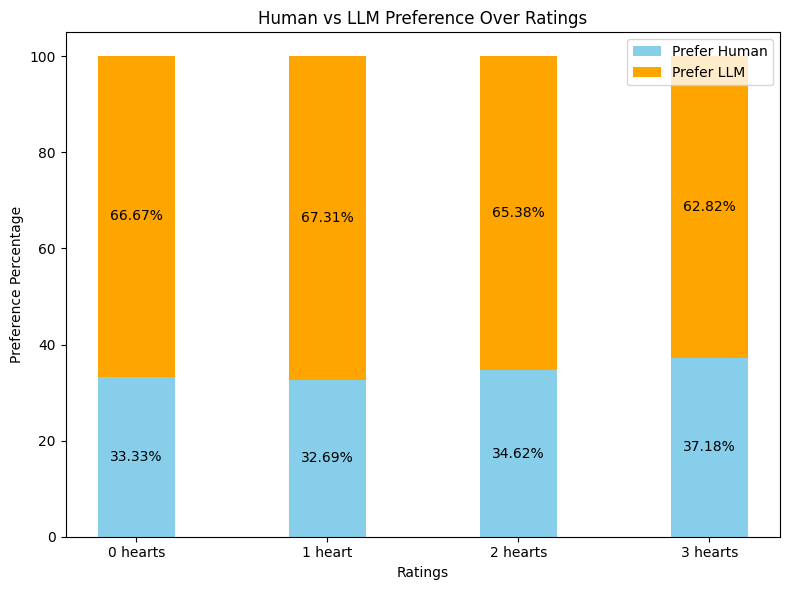

Plot saved to Human_vs_LLM_Preference_Over_Goals.pdf


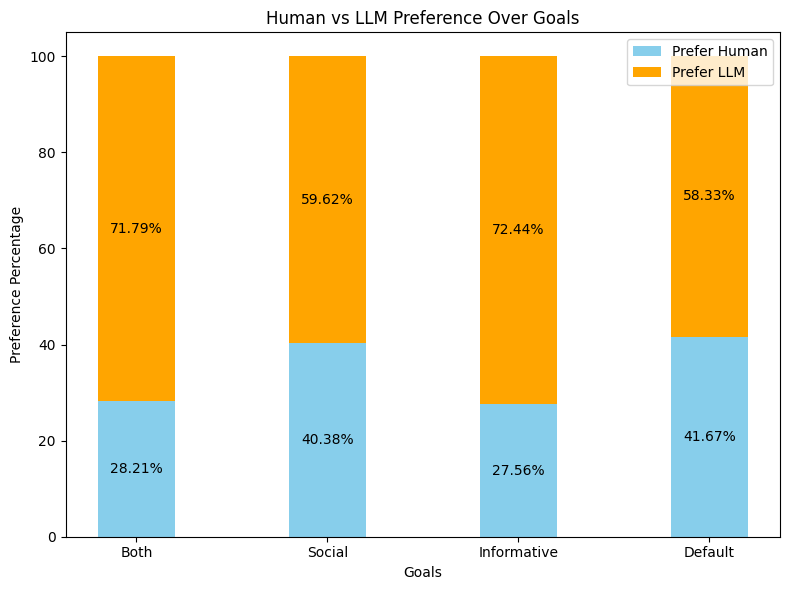

Plot saved to Aligned_Rating_Misaligned_Goal_Human_Response_Over_Ratings.pdf


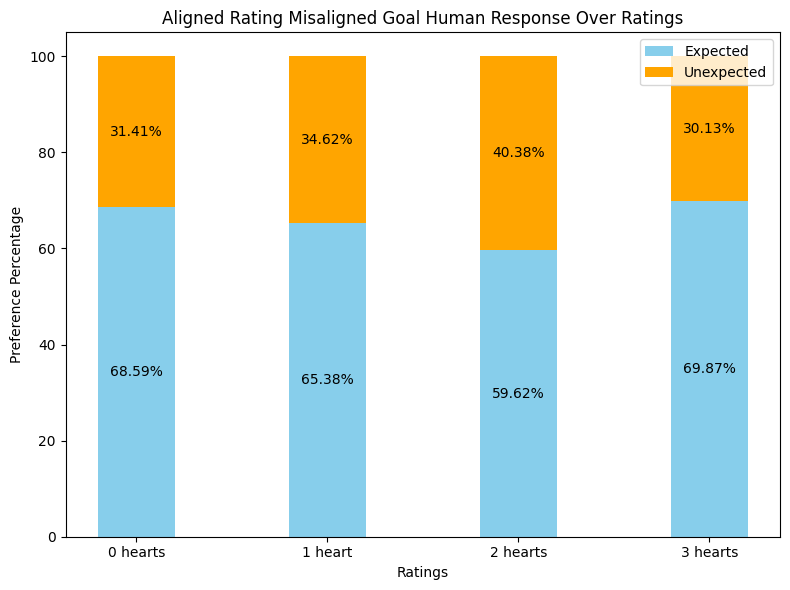

Plot saved to Aligned_Rating_Misaligned_Goal_Human_Response_Over_Goals.pdf


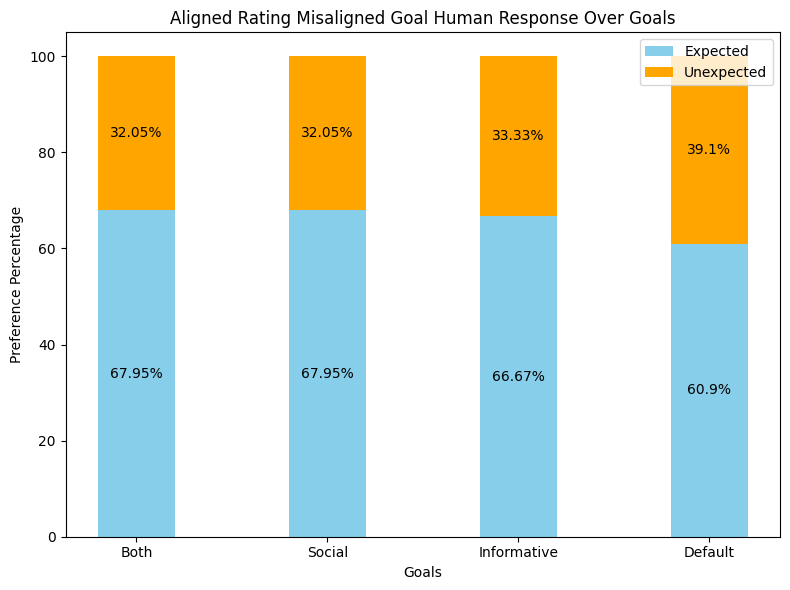

Plot saved to Aligned_Goal_Misaligned_Rating_Human_Response_Over_Ratings.pdf


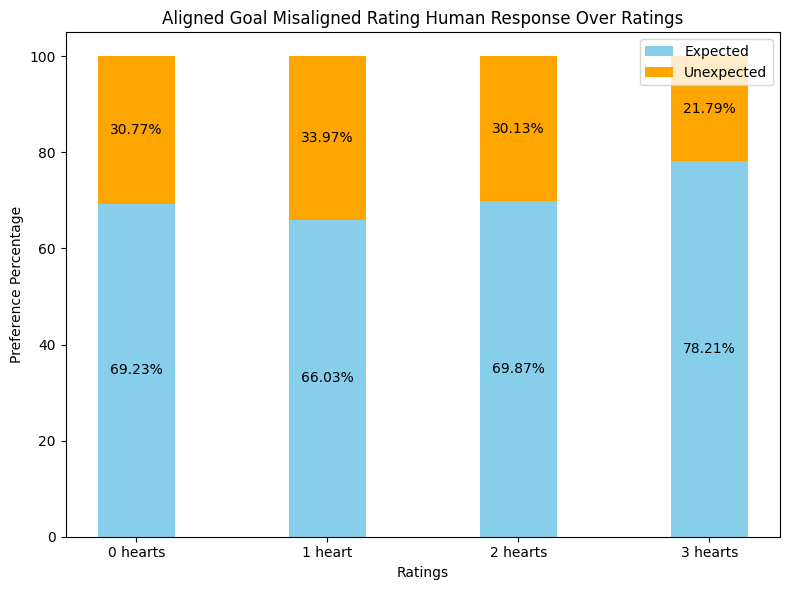

Plot saved to Aligned_Goal_Misaligned_Rating_Human_Response_Over_Goals.pdf


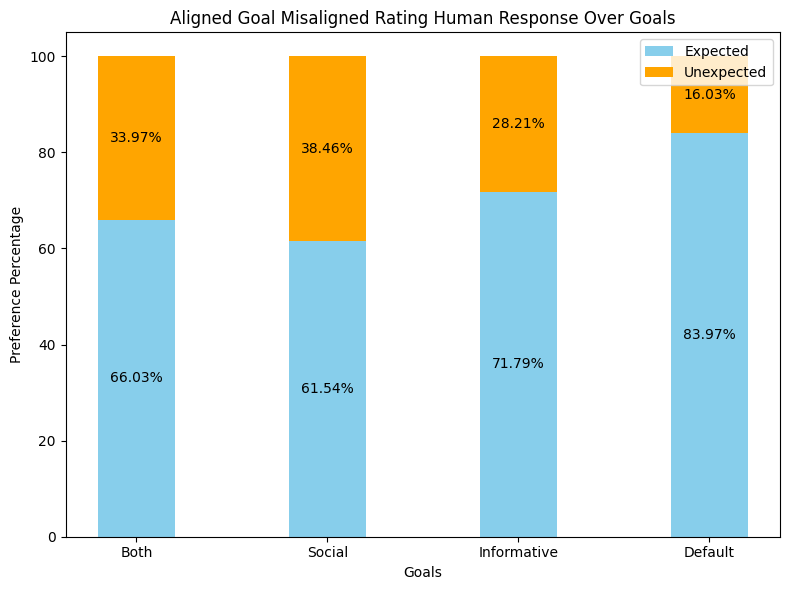

Plot saved to Aligned_Rating_Misaligned_Goal_LLM_Response_Over_Ratings.pdf


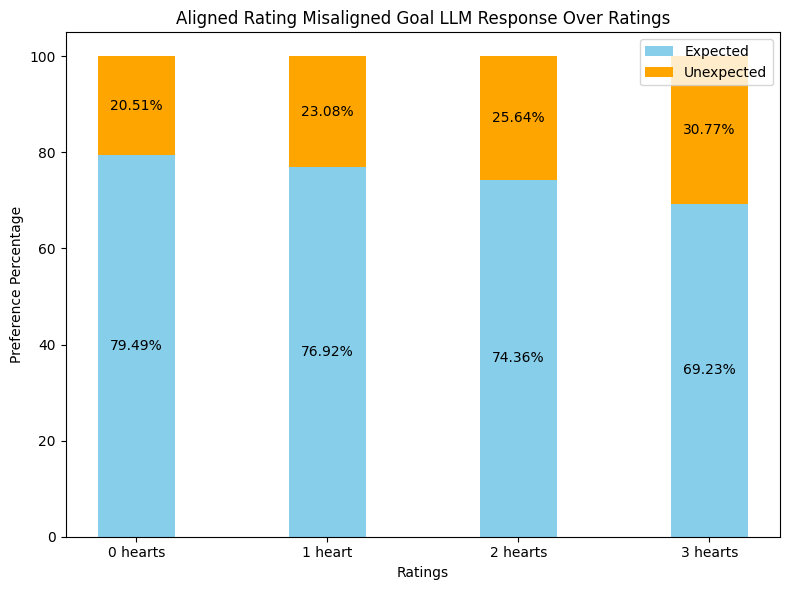

Plot saved to Aligned_Rating_Misaligned_Goal_LLM_Response_Over_Goals.pdf


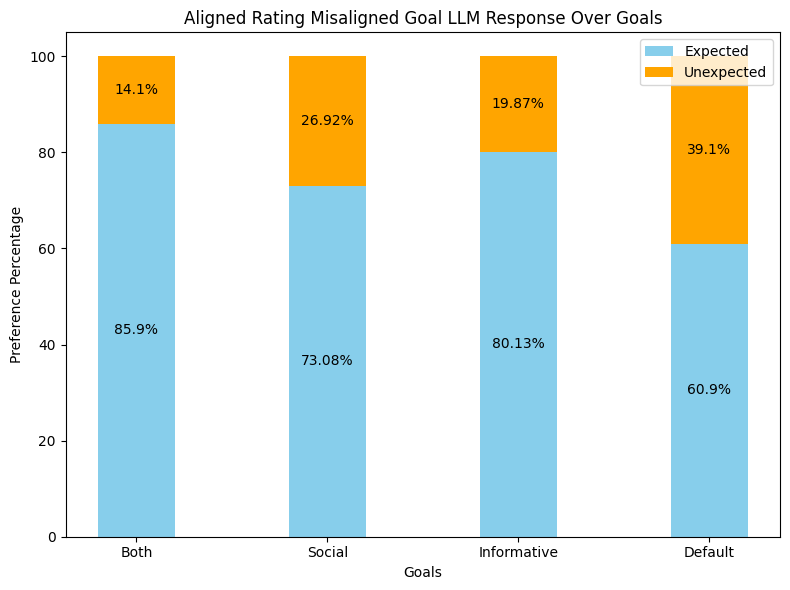

Plot saved to Aligned_Goal_Misaligned_Rating_LLM_Response_Over_Ratings.pdf


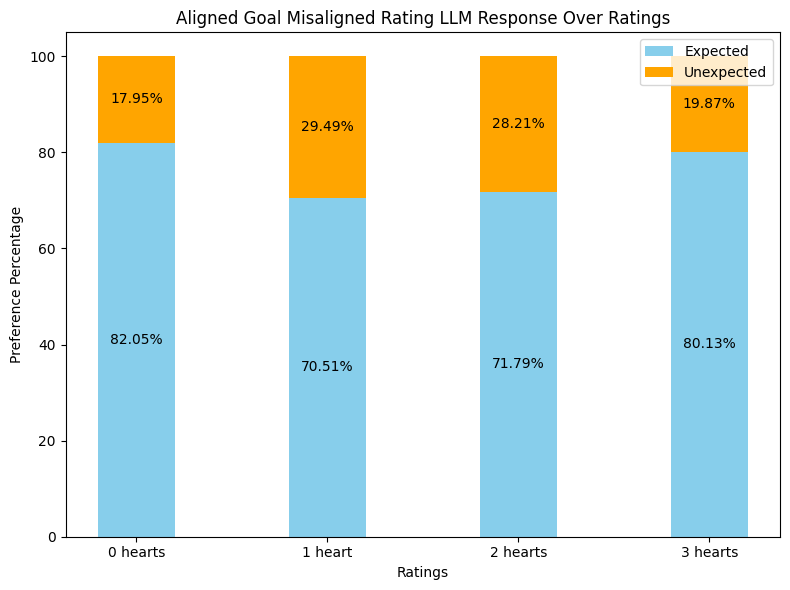

Plot saved to Aligned_Goal_Misaligned_Rating_LLM_Response_Over_Goals.pdf


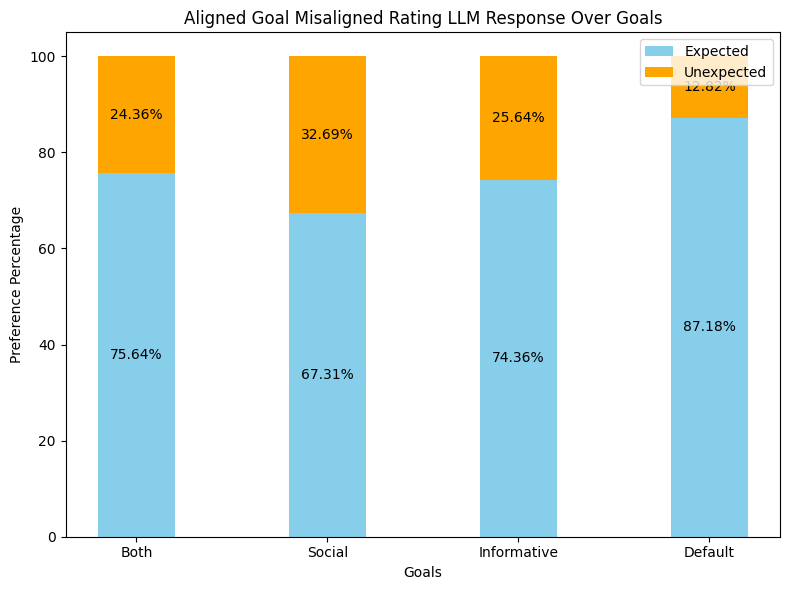

In [30]:
import matplotlib.pyplot as plt
import numpy as np

def plot_ratings(
    groups, 
    rating1, 
    rating2, 
    label1="Rating 1", 
    label2="Rating 2", 
    xlabel="Groups", 
    ylabel="Percentage of Data Rated", 
    title="Ratings Comparison", 
    save_to_pdf=None
):
    # Ensure the total is always 100% for each group
    assert all(r1 + r2 == 100 for r1, r2 in zip(rating1, rating2)), "Ratings must sum to 100%!"
    
    # Bar plot for visualization
    x = np.arange(len(groups))  # x positions for the groups
    width = 0.4  # Width of the bars

    fig, ax = plt.subplots(figsize=(8, 6))

    # Stacked bar chart
    ax.bar(x, rating1, width, label=label1, color='skyblue')
    ax.bar(x, rating2, width, bottom=rating1, label=label2, color='orange')

    # Add labels, title, and legend
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(groups)
    ax.legend(loc='upper right')  # Legend in the upper-right corner

    # Annotate each bar segment with the percentage
    for i in range(len(groups)):
        ax.text(x[i], rating1[i] / 2, f"{rating1[i]}%", ha='center', va='center', color='black')
        ax.text(x[i], rating1[i] + rating2[i] / 2, f"{rating2[i]}%", ha='center', va='center', color='black')

    # Save the plot to a PDF if specified
    if save_to_pdf:
        plt.savefig(save_to_pdf, format='pdf')
        print(f"Plot saved to {save_to_pdf}")

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage

group_goals = ['Both', 'Social', 'Informative', 'Default']
group_ratings = ['0 hearts', '1 heart', '2 hearts', '3 hearts']

Human_vs_LLM_Preference_Over_Ratings_label1 = "Prefer Human"
Human_vs_LLM_Preference_Over_Ratings_label2 = "Prefer LLM"
Human_vs_LLM_Preference_Over_Ratings_xlabel = "Ratings"
Human_vs_LLM_Preference_Over_Ratings_ylabel = "Preference Percentage"
Human_vs_LLM_Preference_Over_Ratings_title = "Human vs LLM Preference Over Ratings"
Human_vs_LLM_Preference_Over_Ratings_save_to_pdf = "./plots/Human_vs_LLM_Preference_Over_Ratings.pdf"

plot_ratings(group_ratings, human_preference_with_respect_to_ratings_list, llm_preference_with_respect_to_ratings_list, Human_vs_LLM_Preference_Over_Ratings_label1, Human_vs_LLM_Preference_Over_Ratings_label2, Human_vs_LLM_Preference_Over_Ratings_xlabel, Human_vs_LLM_Preference_Over_Ratings_ylabel, Human_vs_LLM_Preference_Over_Ratings_title, Human_vs_LLM_Preference_Over_Ratings_save_to_pdf)

Human_vs_LLM_Preference_Over_Goals_label1 = "Prefer Human"
Human_vs_LLM_Preference_Over_Goals_label2 = "Prefer LLM"
Human_vs_LLM_Preference_Over_Goals_xlabel = "Goals"
Human_vs_LLM_Preference_Over_Goals_ylabel = "Preference Percentage"
Human_vs_LLM_Preference_Over_Goals_title = "Human vs LLM Preference Over Goals"
Human_vs_LLM_Preference_Over_Goals_save_to_pdf = "./plots/Human_vs_LLM_Preference_Over_Goals.pdf"

plot_ratings(group_goals, human_preference_with_respect_to_goals_list, llm_preference_with_respect_to_goals_list, Human_vs_LLM_Preference_Over_Goals_label1, Human_vs_LLM_Preference_Over_Goals_label2, Human_vs_LLM_Preference_Over_Goals_xlabel, Human_vs_LLM_Preference_Over_Goals_ylabel, Human_vs_LLM_Preference_Over_Goals_title, Human_vs_LLM_Preference_Over_Goals_save_to_pdf)

aligned_rating_misaligned_goal_human_response_over_ratings_label1 = "Expected"
aligned_rating_misaligned_goal_human_response_over_ratings_label2 = "Unexpected"
aligned_rating_misaligned_goal_human_response_over_ratings_xlabel = "Ratings"
aligned_rating_misaligned_goal_human_response_over_ratings_ylabel = "Preference Percentage"
aligned_rating_misaligned_goal_human_response_over_ratings_title = "Aligned Rating Misaligned Goal Human Response Over Ratings"
aligned_rating_misaligned_goal_human_response_over_ratings_save_to_pdf = "./plots/Aligned_Rating_Misaligned_Goal_Human_Response_Over_Ratings.pdf"

plot_ratings(group_ratings, expected_aligned_rating_misaligned_goal_human_response_comparison_with_respect_to_ratings_list, unexpected_aligned_rating_misaligned_goal_human_response_comparison_with_respect_to_ratings_list, aligned_rating_misaligned_goal_human_response_over_ratings_label1, aligned_rating_misaligned_goal_human_response_over_ratings_label2, aligned_rating_misaligned_goal_human_response_over_ratings_xlabel, aligned_rating_misaligned_goal_human_response_over_ratings_ylabel, aligned_rating_misaligned_goal_human_response_over_ratings_title, aligned_rating_misaligned_goal_human_response_over_ratings_save_to_pdf)

aligned_rating_misaligned_goal_human_response_over_goals_label1 = "Expected"
aligned_rating_misaligned_goal_human_response_over_goals_label2 = "Unexpected"
aligned_rating_misaligned_goal_human_response_over_goals_xlabel = "Goals"
aligned_rating_misaligned_goal_human_response_over_goals_ylabel = "Preference Percentage"
aligned_rating_misaligned_goal_human_response_over_goals_title = "Aligned Rating Misaligned Goal Human Response Over Goals"
aligned_rating_misaligned_goal_human_response_over_goals_save_to_pdf = "./plots/Aligned_Rating_Misaligned_Goal_Human_Response_Over_Goals.pdf"

plot_ratings(group_goals, expected_aligned_rating_misaligned_goal_human_response_comparison_with_respect_to_goals_list, unexpected_aligned_rating_misaligned_goal_human_response_comparison_with_respect_to_goals_list, aligned_rating_misaligned_goal_human_response_over_goals_label1, aligned_rating_misaligned_goal_human_response_over_goals_label2, aligned_rating_misaligned_goal_human_response_over_goals_xlabel, aligned_rating_misaligned_goal_human_response_over_goals_ylabel, aligned_rating_misaligned_goal_human_response_over_goals_title, aligned_rating_misaligned_goal_human_response_over_goals_save_to_pdf)

aligned_goal_misaligned_rating_human_response_over_ratings_label1 = "Expected"
aligned_goal_misaligned_rating_human_response_over_ratings_label2 = "Unexpected"
aligned_goal_misaligned_rating_human_response_over_ratings_xlabel = "Ratings"
aligned_goal_misaligned_rating_human_response_over_ratings_ylabel = "Preference Percentage"
aligned_goal_misaligned_rating_human_response_over_ratings_title = "Aligned Goal Misaligned Rating Human Response Over Ratings"
aligned_goal_misaligned_rating_human_response_over_ratings_save_to_pdf = "./plots/Aligned_Goal_Misaligned_Rating_Human_Response_Over_Ratings.pdf"

plot_ratings(group_ratings, expected_aligned_goal_misaligned_rating_human_response_comparison_with_respect_to_ratings_list, unexpected_aligned_goal_misaligned_rating_human_response_comparison_with_respect_to_ratings_list, aligned_goal_misaligned_rating_human_response_over_ratings_label1, aligned_goal_misaligned_rating_human_response_over_ratings_label2, aligned_goal_misaligned_rating_human_response_over_ratings_xlabel, aligned_goal_misaligned_rating_human_response_over_ratings_ylabel, aligned_goal_misaligned_rating_human_response_over_ratings_title, aligned_goal_misaligned_rating_human_response_over_ratings_save_to_pdf)

aligned_goal_misaligned_rating_human_response_over_goals_label1 = "Expected"
aligned_goal_misaligned_rating_human_response_over_goals_label2 = "Unexpected"
aligned_goal_misaligned_rating_human_response_over_goals_xlabel = "Goals"
aligned_goal_misaligned_rating_human_response_over_goals_ylabel = "Preference Percentage"
aligned_goal_misaligned_rating_human_response_over_goals_title = "Aligned Goal Misaligned Rating Human Response Over Goals"
aligned_goal_misaligned_rating_human_response_over_goals_save_to_pdf = "./plots/Aligned_Goal_Misaligned_Rating_Human_Response_Over_Goals.pdf"

plot_ratings(group_goals, expected_aligned_goal_misaligned_rating_human_response_comparison_with_respect_to_goals_list, unexpected_aligned_goal_misaligned_rating_human_response_comparison_with_respect_to_goals_list, aligned_goal_misaligned_rating_human_response_over_goals_label1, aligned_goal_misaligned_rating_human_response_over_goals_label2, aligned_goal_misaligned_rating_human_response_over_goals_xlabel, aligned_goal_misaligned_rating_human_response_over_goals_ylabel, aligned_goal_misaligned_rating_human_response_over_goals_title, aligned_goal_misaligned_rating_human_response_over_goals_save_to_pdf)

aligned_rating_misaligned_goal_llm_response_over_ratings_label1 = "Expected"
aligned_rating_misaligned_goal_llm_response_over_ratings_label2 = "Unexpected"
aligned_rating_misaligned_goal_llm_response_over_ratings_xlabel = "Ratings"
aligned_rating_misaligned_goal_llm_response_over_ratings_ylabel = "Preference Percentage"
aligned_rating_misaligned_goal_llm_response_over_ratings_title = "Aligned Rating Misaligned Goal LLM Response Over Ratings"
aligned_rating_misaligned_goal_llm_response_over_ratings_save_to_pdf = "./plots/Aligned_Rating_Misaligned_Goal_LLM_Response_Over_Ratings.pdf"

plot_ratings(group_ratings, expected_aligned_rating_misaligned_goal_llm_response_comparison_with_respect_to_ratings_list, unexpected_aligned_rating_misaligned_goal_llm_response_comparison_with_respect_to_ratings_list, aligned_rating_misaligned_goal_llm_response_over_ratings_label1, aligned_rating_misaligned_goal_llm_response_over_ratings_label2, aligned_rating_misaligned_goal_llm_response_over_ratings_xlabel, aligned_rating_misaligned_goal_llm_response_over_ratings_ylabel, aligned_rating_misaligned_goal_llm_response_over_ratings_title, aligned_rating_misaligned_goal_llm_response_over_ratings_save_to_pdf)

aligned_rating_misaligned_goal_llm_response_over_goals_label1 = "Expected"
aligned_rating_misaligned_goal_llm_response_over_goals_label2 = "Unexpected"
aligned_rating_misaligned_goal_llm_response_over_goals_xlabel = "Goals"
aligned_rating_misaligned_goal_llm_response_over_goals_ylabel = "Preference Percentage"
aligned_rating_misaligned_goal_llm_response_over_goals_title = "Aligned Rating Misaligned Goal LLM Response Over Goals"
aligned_rating_misaligned_goal_llm_response_over_goals_save_to_pdf = "./plots/Aligned_Rating_Misaligned_Goal_LLM_Response_Over_Goals.pdf"

plot_ratings(group_goals, expected_aligned_rating_misaligned_goal_llm_response_comparison_with_respect_to_goals_list, unexpected_aligned_rating_misaligned_goal_llm_response_comparison_with_respect_to_goals_list, aligned_rating_misaligned_goal_llm_response_over_goals_label1, aligned_rating_misaligned_goal_llm_response_over_goals_label2, aligned_rating_misaligned_goal_llm_response_over_goals_xlabel, aligned_rating_misaligned_goal_llm_response_over_goals_ylabel, aligned_rating_misaligned_goal_llm_response_over_goals_title, aligned_rating_misaligned_goal_llm_response_over_goals_save_to_pdf)

aligned_goal_misaligned_rating_llm_response_over_ratings_label1 = "Expected"
aligned_goal_misaligned_rating_llm_response_over_ratings_label2 = "Unexpected"
aligned_goal_misaligned_rating_llm_response_over_ratings_xlabel = "Ratings"
aligned_goal_misaligned_rating_llm_response_over_ratings_ylabel = "Preference Percentage"
aligned_goal_misaligned_rating_llm_response_over_ratings_title = "Aligned Goal Misaligned Rating LLM Response Over Ratings"
aligned_goal_misaligned_rating_llm_response_over_ratings_save_to_pdf = "./plots/Aligned_Goal_Misaligned_Rating_LLM_Response_Over_Ratings.pdf"

plot_ratings(group_ratings, expected_aligned_goal_misaligned_rating_llm_response_comparison_with_respect_to_ratings_list, unexpected_aligned_goal_misaligned_rating_llm_response_comparison_with_respect_to_ratings_list, aligned_goal_misaligned_rating_llm_response_over_ratings_label1, aligned_goal_misaligned_rating_llm_response_over_ratings_label2, aligned_goal_misaligned_rating_llm_response_over_ratings_xlabel, aligned_goal_misaligned_rating_llm_response_over_ratings_ylabel, aligned_goal_misaligned_rating_llm_response_over_ratings_title, aligned_goal_misaligned_rating_llm_response_over_ratings_save_to_pdf)

aligned_goal_misaligned_rating_llm_response_over_goals_label1 = "Expected"
aligned_goal_misaligned_rating_llm_response_over_goals_label2 = "Unexpected"
aligned_goal_misaligned_rating_llm_response_over_goals_xlabel = "Goals"
aligned_goal_misaligned_rating_llm_response_over_goals_ylabel = "Preference Percentage"
aligned_goal_misaligned_rating_llm_response_over_goals_title = "Aligned Goal Misaligned Rating LLM Response Over Goals"
aligned_goal_misaligned_rating_llm_response_over_goals_save_to_pdf = "./plots/Aligned_Goal_Misaligned_Rating_LLM_Response_Over_Goals.pdf"

plot_ratings(group_goals, expected_aligned_goal_misaligned_rating_llm_response_comparison_with_respect_to_goals_list, unexpected_aligned_goal_misaligned_rating_llm_response_comparison_with_respect_to_goals_list, aligned_goal_misaligned_rating_llm_response_over_goals_label1, aligned_goal_misaligned_rating_llm_response_over_goals_label2, aligned_goal_misaligned_rating_llm_response_over_goals_xlabel, aligned_goal_misaligned_rating_llm_response_over_goals_ylabel, aligned_goal_misaligned_rating_llm_response_over_goals_title, aligned_goal_misaligned_rating_llm_response_over_goals_save_to_pdf)

In [126]:
human_preference_with_respect_to_ratings_list, llm_preference_with_respect_to_ratings_list

([35.16, 33.59, 32.03, 35.16], [64.84, 66.41, 67.97, 64.84])

### appendix code

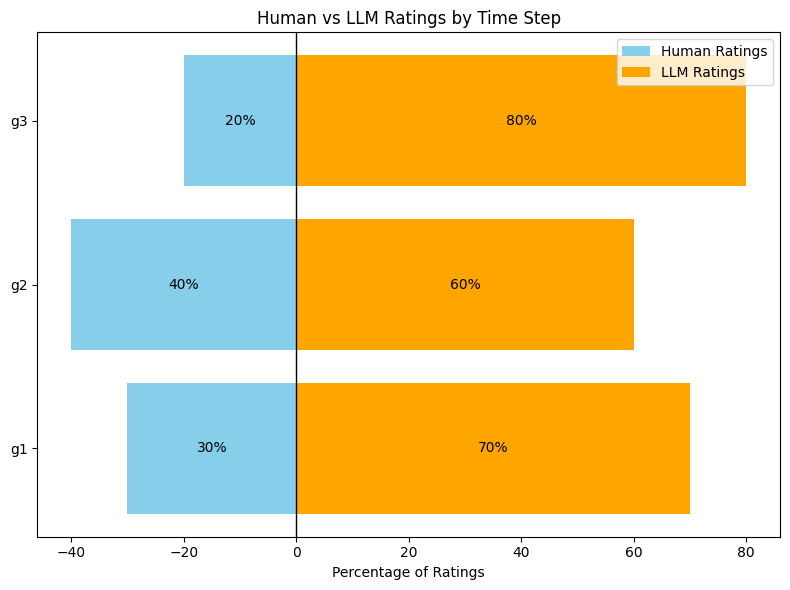

In [44]:
import matplotlib.pyplot as plt

# Example data
time_steps = ['g1', 'g2', 'g3']  # Time steps
human_ratings = [30, 40, 20]  # Human rating percentages
llm_ratings = [70, 60, 80]  # LLM rating percentages

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 6))

# Plot human ratings on the left side (negative values for left)
ax.barh(time_steps, [-x for x in human_ratings], color='skyblue', label='Human Ratings', align='center')

# Plot LLM ratings on the right side
ax.barh(time_steps, llm_ratings, color='orange', label='LLM Ratings', align='center')

# Add labels and styling
ax.set_xlabel('Percentage of Ratings')
ax.set_title('Human vs LLM Ratings by Time Step')
ax.axvline(0, color='black', linewidth=1)  # Add the vertical centerline
ax.legend()

# Annotate the bars with the actual values
for i, (h, l) in enumerate(zip(human_ratings, llm_ratings)):
    ax.text(-h / 2, i, f"{h}%", va='center', ha='center', color='black')  # Human annotation
    ax.text(l / 2, i, f"{l}%", va='center', ha='center', color='black')   # LLM annotation

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

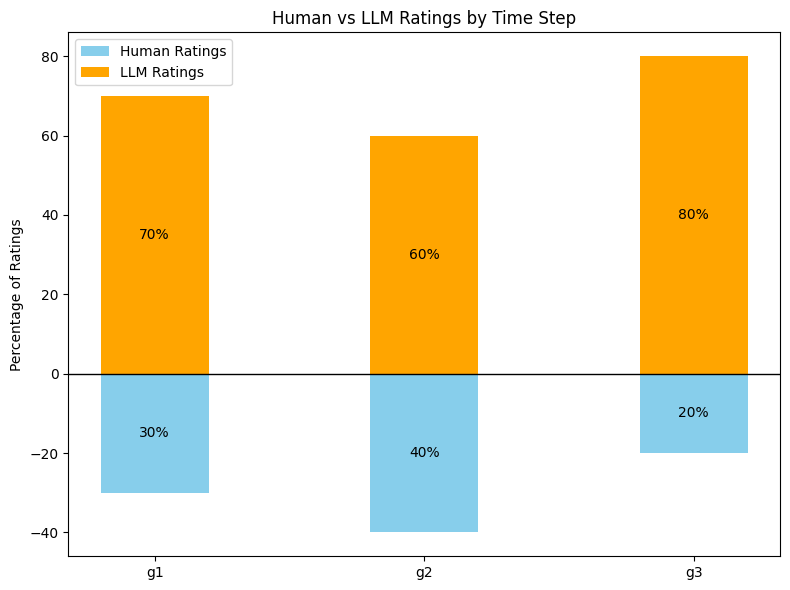

In [45]:
import matplotlib.pyplot as plt

# Example data
time_steps = ['g1', 'g2', 'g3']  # Time steps
human_ratings = [30, 40, 20]  # Human rating percentages
llm_ratings = [70, 60, 80]  # LLM rating percentages

# Create the vertical bar chart
fig, ax = plt.subplots(figsize=(8, 6))

# Plot human ratings below the x-axis (negative values for below)
ax.bar(time_steps, [-x for x in human_ratings], color='skyblue', label='Human Ratings', width=0.4, align='center')

# Plot LLM ratings above the x-axis
ax.bar(time_steps, llm_ratings, color='orange', label='LLM Ratings', width=0.4, align='center')

# Add labels and styling
ax.set_ylabel('Percentage of Ratings')
ax.set_title('Human vs LLM Ratings by Time Step')
ax.axhline(0, color='black', linewidth=1)  # Add the horizontal centerline
ax.legend()

# Annotate the bars with the actual values
for i, (h, l) in enumerate(zip(human_ratings, llm_ratings)):
    ax.text(i, -h / 2, f"{h}%", va='center', ha='center', color='black')  # Human annotation
    ax.text(i, l / 2, f"{l}%", va='center', ha='center', color='black')   # LLM annotation

# Adjust layout and display the plot
plt.tight_layout()
plt.show()